# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
import joblib

# **2. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [68]:
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2532      TX001046   AC00474             230.08  2023-05-01 16:23:40   
2533      TX001484   AC00198             561.58  2023-06-23 17:38:26   
2534      TX000200   AC00358             493.11  2023-07-31 16:25:26   
2535      TX000592   AC00057             198.62  2023-05-15 16:19:14   
2536      TX000026   AC00041               7.49  2023-10-20 17:53:13   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.

# **3. Exploratory Data Analysis (EDA)**

### **1. Memahami Struktur Dataset**

kita melihat informasi dasar seperti jumlah baris, jumlah kolom, nama-nama kolom, tipe data setiap kolom, dan jumlah non-null values. Ini membantu kita memahami gambaran awal dataset.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

### **2. Statistik Deskriptif**

Ini membantu kita mengidentifikasi rentang nilai, tendensi sentral, dan sebaran data untuk setiap fitur numerik.

In [70]:
df.describe(include='all')

TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2508      2516        2511.000000                 2509   
unique          2484       495                NaN                 2485   
top         TX001748   AC00362                NaN  2023-10-20 17:53:13   
freq               2        12                NaN                    2   
mean             NaN       NaN         297.656468                  NaN   
std              NaN       NaN         292.230367                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.310000                  NaN   
50%              NaN       NaN         211.360000                  NaN   
75%              NaN       NaN         413.105000                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2507        2507     2507            2517       2514   
unique               2          43      681             591        100   
top              Debit  Fort Worth  D000573  200.136.146.93       M026   
freq              1942          71        9              12         46   
mean               NaN         NaN      NaN             NaN        NaN   
std                NaN         NaN      NaN             NaN        NaN   
min                NaN         NaN      NaN             NaN        NaN   
25%                NaN         NaN      NaN             NaN        NaN   
50%                NaN         NaN      NaN             NaN        NaN   
75%                NaN         NaN      NaN             NaN        NaN   
max                NaN         NaN      NaN             NaN        NaN   

       Channel  CustomerAge CustomerOccupation  TransactionDuration  \
count     2510  2519.000000               2514          2511.000000   
unique       3          NaN                  4                  NaN   
top     Branch          NaN            Student                  NaN   
freq       868          NaN                657                  NaN   
mean       NaN    44.678444                NaN           119.422939   
std        NaN    17.837359                NaN            70.078513   
min        NaN    18.000000                NaN            10.000000   
25%        NaN    27.000000                NaN            63.000000   
50%        NaN    45.000000                NaN           112.000000   
75%        NaN    59.000000                NaN           161.000000   
max        NaN    80.000000                NaN           300.000000   

        LoginAttempts  AccountBalance PreviousTransactionDate  
count     2516.000000     2510.000000                    2513  
unique            NaN             NaN                     360  
top               NaN             NaN     2024-11-04 08:09:17  
freq              NaN             NaN                      18  
mean         1.121622     5113.438124                     NaN  
std          0.594469     3897.975861                     NaN  
min          1.000000      101.250000                     NaN  
25%          1.000000     1504.727500                     NaN  
50%          1.000000     4734.110000                     NaN  
75%          1.000000     7672.687500                     NaN  
max          5.000000    14977.990000                     NaN

In [71]:
num_stats = df.describe()
num_stats

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

In [72]:
cat_stats = df.describe(include='object').T
cat_stats

count unique                  top  freq
TransactionID            2508   2484             TX001748     2
AccountID                2516    495              AC00362    12
TransactionDate          2509   2485  2023-10-20 17:53:13     2
TransactionType          2507      2                Debit  1942
Location                 2507     43           Fort Worth    71
DeviceID                 2507    681              D000573     9
IP Address               2517    591       200.136.146.93    12
MerchantID               2514    100                 M026    46
Channel                  2510      3               Branch   868
CustomerOccupation       2514      4              Student   657
PreviousTransactionDate  2513    360  2024-11-04 08:09:17    18

### **3. Mengecek Nilai yang Hilang (Missing Values)**

Penting untuk mengetahui apakah ada nilai yang hilang dalam dataset karena ini dapat mempengaruhi analisis dan pemodelan. Kita bisa menggunakan kode berikut:

In [73]:
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [74]:
# Periksa nilai yang hilang dan terduplikasi
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 403
Duplicated values: 21


In [75]:
# Menampilkan jumlah nilai unik di setiap kolom
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2484
AccountID                   495
TransactionAmount          2433
TransactionDate            2485
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  591
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2483
PreviousTransactionDate     360
dtype: int64


Output dari kode ini akan menunjukkan jumlah nilai yang hilang untuk setiap kolom.

### **4. Visualisasi Distribusi Data**

Visualisasi membantu kita memahami distribusi setiap fitur.

- Histogram: Untuk melihat distribusi frekuensi dari fitur numerik.

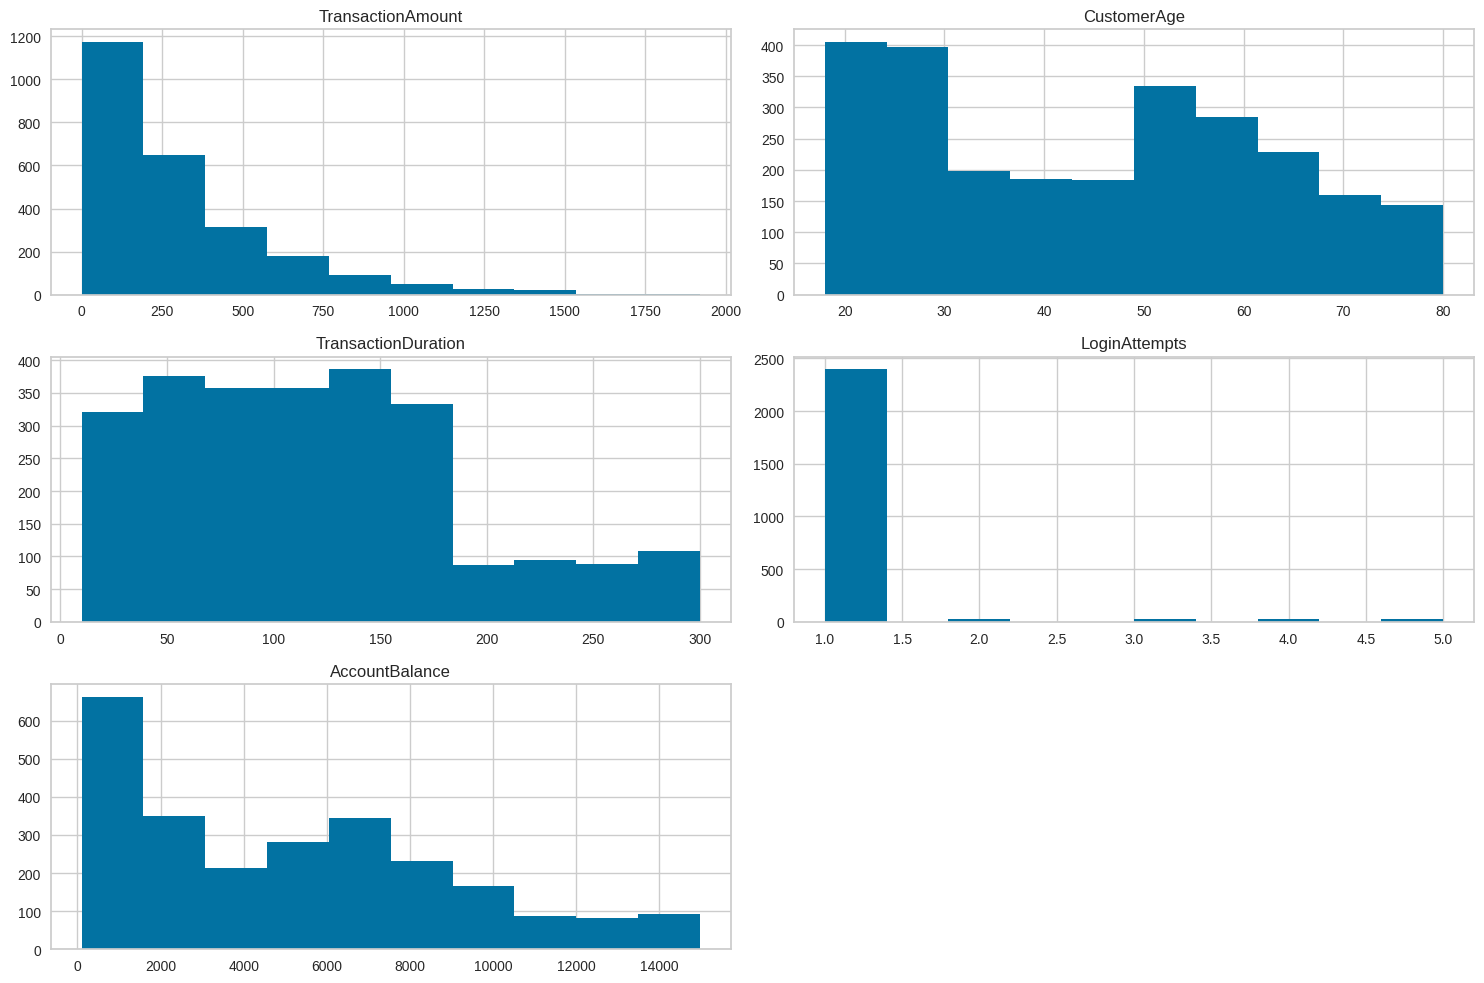

In [76]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

- Boxplot: Untuk melihat ringkasan distribusi data numerik dan mengidentifikasi potensi outliers.

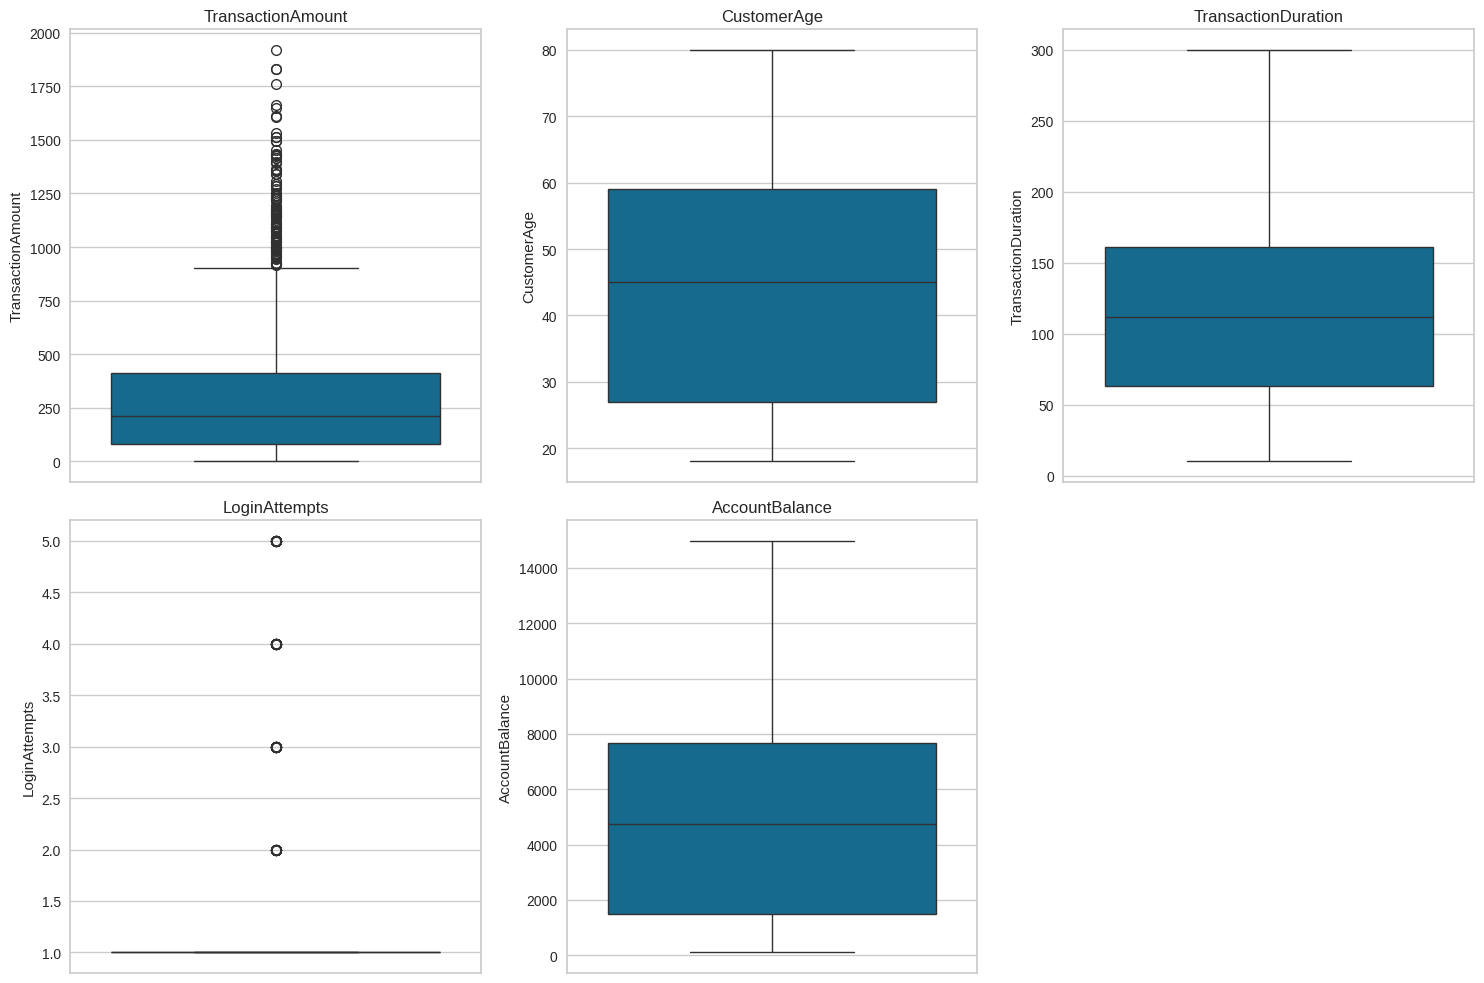

In [77]:
plt.figure(figsize=(15, 10))

# Dapatkan daftar kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns
num_numeric_cols = len(numeric_cols)

# Hitung jumlah baris yang dibutuhkan berdasarkan jumlah kolom numerik dan kolom per baris
# Gunakan batas atas untuk memastikan baris yang cukup dialokasikan meskipun baris terakhir tidak penuh
import math
nrows = math.ceil(num_numeric_cols / 3) # Dengan asumsi 3 kolom per baris

# Perbarui pembuatan subplot dengan jumlah baris yang dihitung
for i, column in enumerate(numeric_cols):
    # Sesuaikan indeks subplot berdasarkan dimensi grid yang baru
    plt.subplot(nrows, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- Count Plot: Untuk melihat jumlah kemunculan setiap kategori pada fitur kategorikal (jika ada). Karena deskripsi dataset Anda tidak secara eksplisit menyebutkan fitur kategorikal, kita fokus pada numerik terlebih dahulu. Jika ada, kita bisa tambahkan nanti.

In [78]:
# Contoh jika ada kolom kategorikal bernama 'nama_kolom_kategorikal'
# sns.countplot(x='nama_kolom_kategorikal', data=df)
# plt.show()

- Univariate Analysis

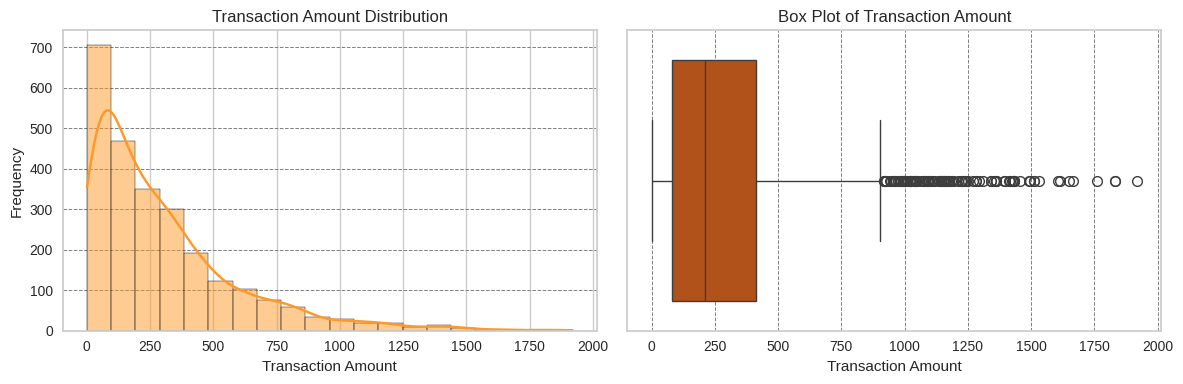


Summary Statistics for Transaction Amount:
 count    2511.000000
mean      297.656468
std       292.230367
min         0.260000
25%        81.310000
50%       211.360000
75%       413.105000
max      1919.110000
Name: TransactionAmount, dtype: float64


In [79]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['TransactionAmount'].describe())

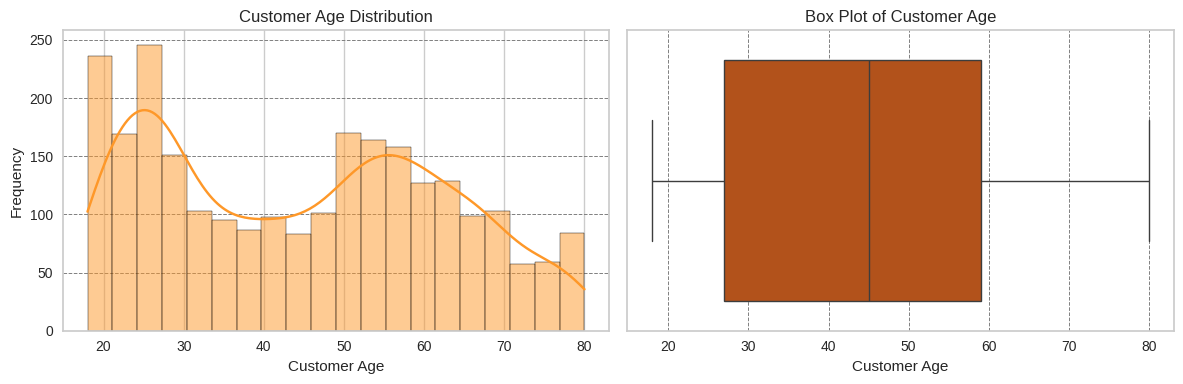


Summary Statistics for Customer Age:
 count    2519.000000
mean       44.678444
std        17.837359
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [80]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['CustomerAge'].describe())

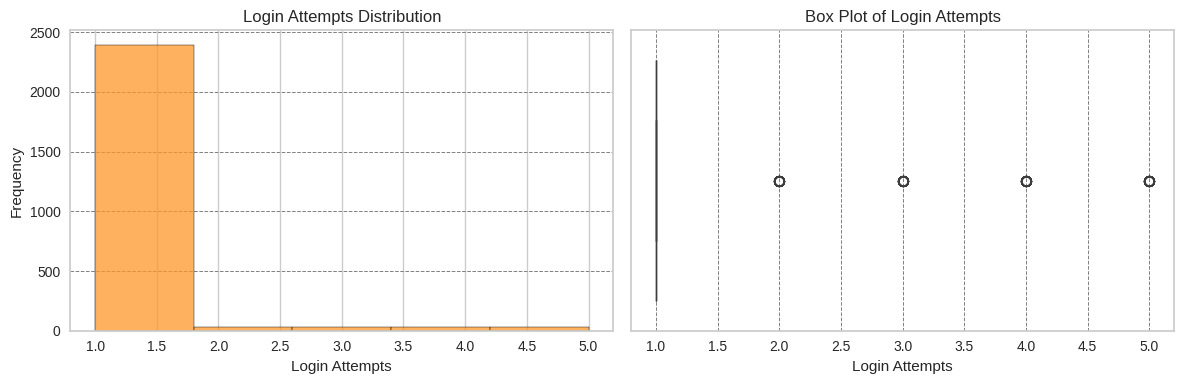


Summary Statistics for Login Attempts:
 count    2516.000000
mean        1.121622
std         0.594469
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [81]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['LoginAttempts'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Login Attempts Distribution')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['LoginAttempts'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Login Attempts:\n', df['LoginAttempts'].describe())

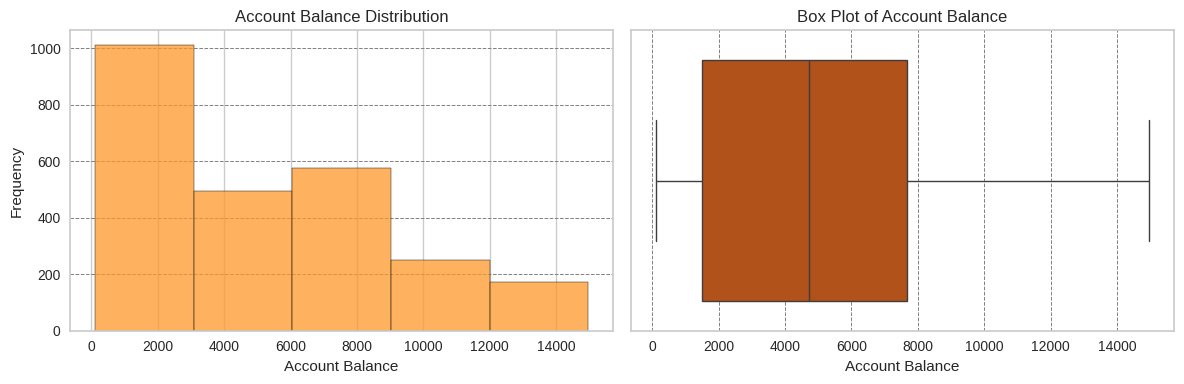


Summary Statistics for Account Balance:
 count     2510.000000
mean      5113.438124
std       3897.975861
min        101.250000
25%       1504.727500
50%       4734.110000
75%       7672.687500
max      14977.990000
Name: AccountBalance, dtype: float64


In [82]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AccountBalance'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Account Balance Distribution')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['AccountBalance'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Account Balance:\n', df['AccountBalance'].describe())

<ipython-input-83-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
<ipython-input-83-d9905d33350a>:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


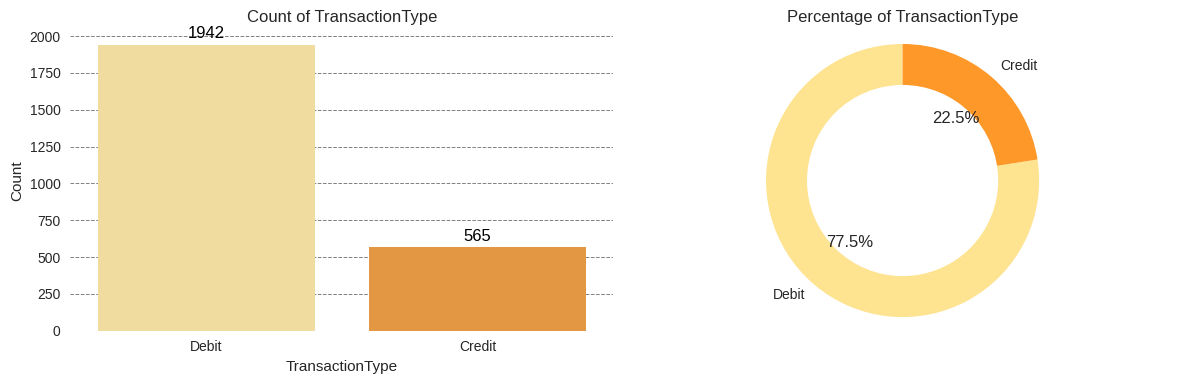

In [83]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)

    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

<ipython-input-83-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
<ipython-input-83-d9905d33350a>:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


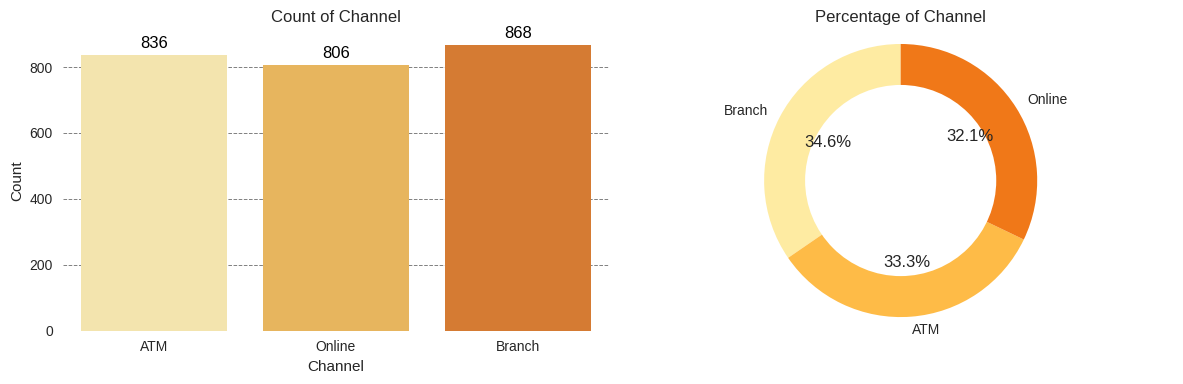

In [84]:
plot_categorical_distribution(df, 'Channel')

<ipython-input-83-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
<ipython-input-83-d9905d33350a>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


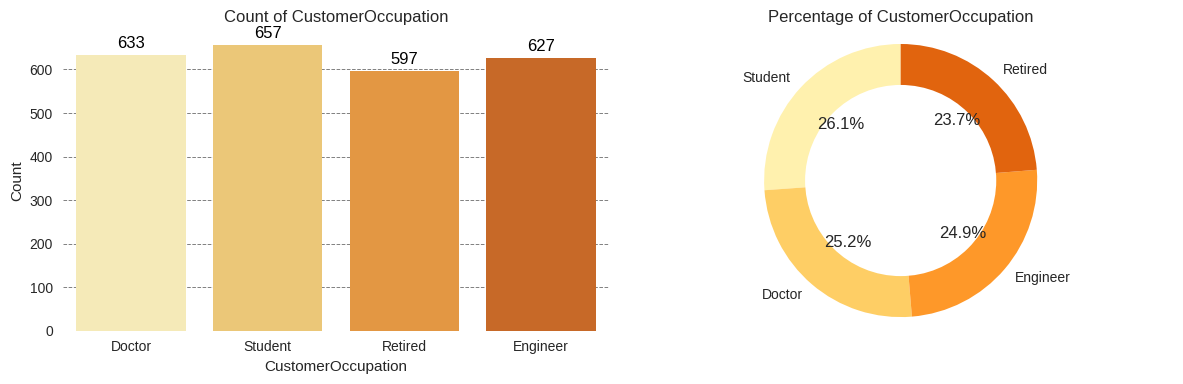

In [85]:
plot_categorical_distribution(df, 'CustomerOccupation')

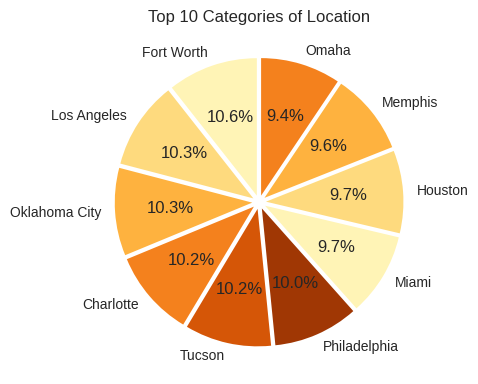

In [86]:
def plot_top_categories_pie_chart(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(8, 4))

    top_categories = data[column_name].value_counts().nlargest(10)

    top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                             startangle=90, explode=[0.05] * len(top_categories))

    plt.title(f'Top 10 Categories of {column_name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

plot_top_categories_pie_chart('Location')

In [87]:
location_stats = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(location_stats.nlargest(10, 'count')) # Top 10 locations by transaction count

               count        mean   median
Location                                 
Fort Worth        71  292.919437  223.220
Los Angeles       69  285.155797  170.190
Oklahoma City     69  319.271449  231.510
Charlotte         68  252.428971  168.755
Tucson            68  303.799706  208.180
Miami             65  265.549077  172.920
Philadelphia      65  294.670923  177.050
Houston           64  303.693438  221.280
Memphis           64  343.092812  202.485
Omaha             63  290.724921  195.540


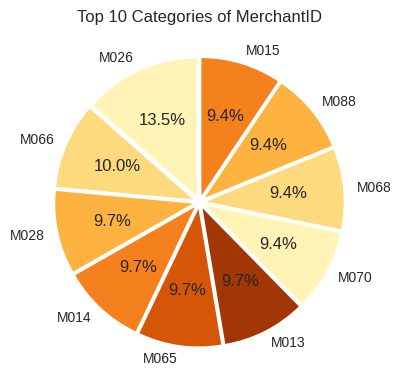

In [88]:
plot_top_categories_pie_chart('MerchantID')

In [89]:
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(merchant_stats.nlargest(10, 'count')) # Top 10 merchants by transaction count, with amount stats


            count        mean   median
MerchantID                            
M026           46  322.576957  200.265
M066           34  356.755000  244.210
M013           33  315.646970  236.810
M014           33  286.909091  256.800
M065           33  240.501818  166.550
M028           32  309.626250  180.160
M088           32  282.311875  215.960
M001           31  264.097097  153.590
M004           31  265.268387  124.720
M015           31  293.809032  168.110


- Bivariate Analysis

<ipython-input-90-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-90-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-90-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


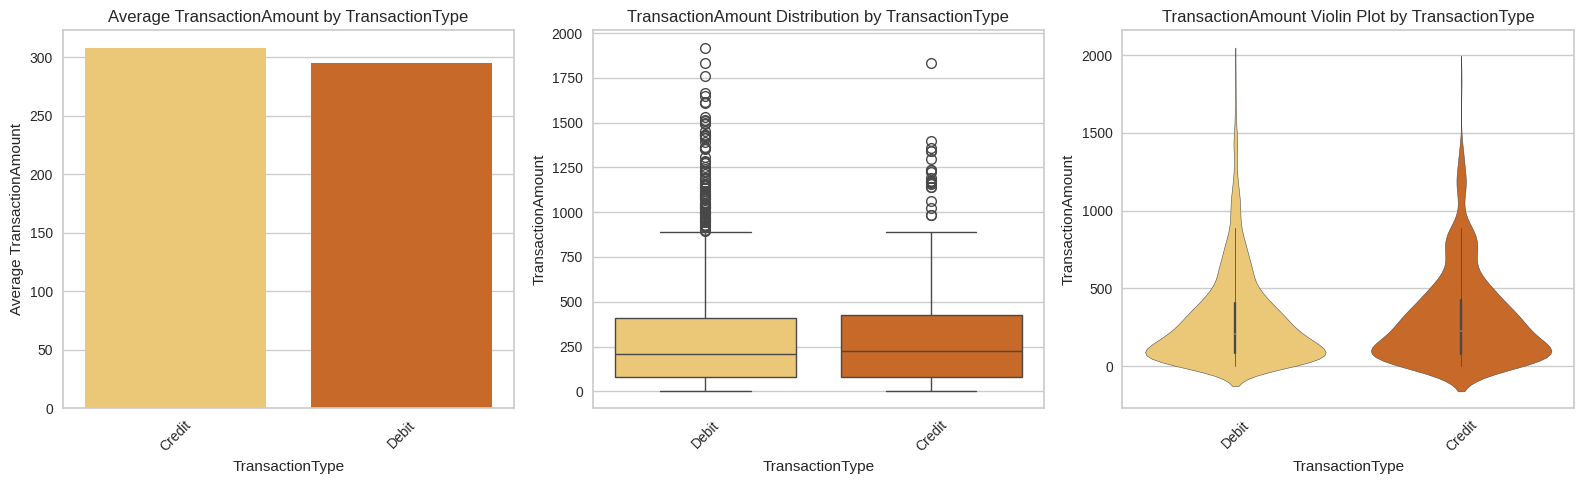

In [90]:
def plot_categorical_relationships(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_relationships('TransactionType')

<ipython-input-90-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-90-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-90-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


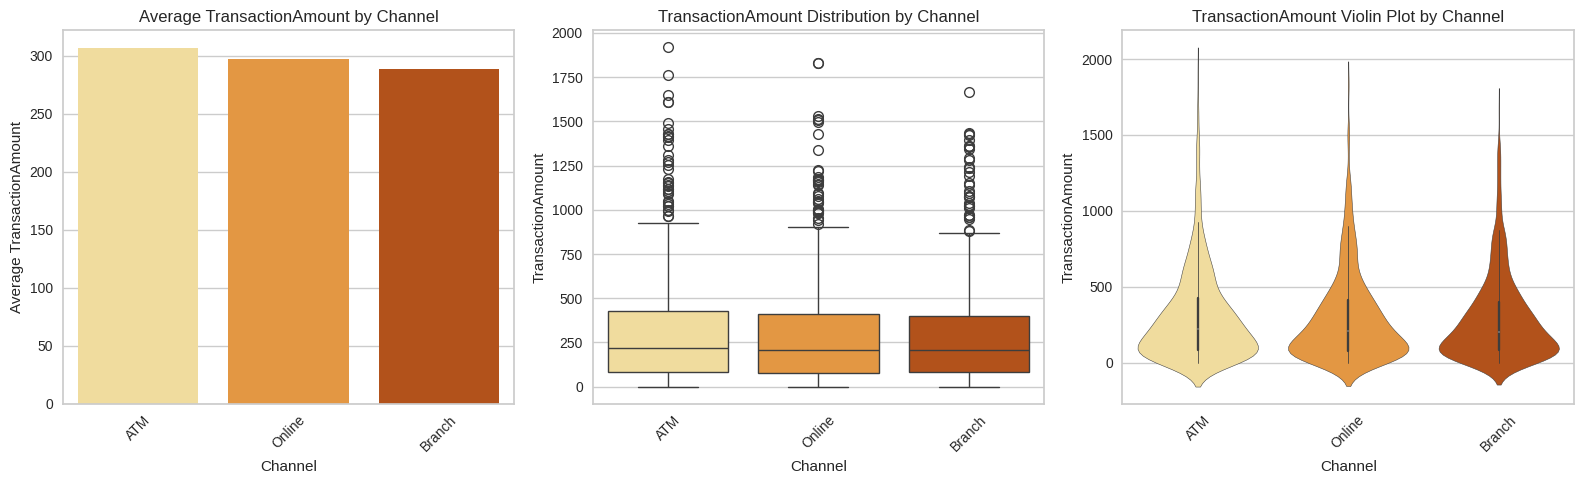

In [91]:
plot_categorical_relationships('Channel')

<ipython-input-90-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-90-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-90-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


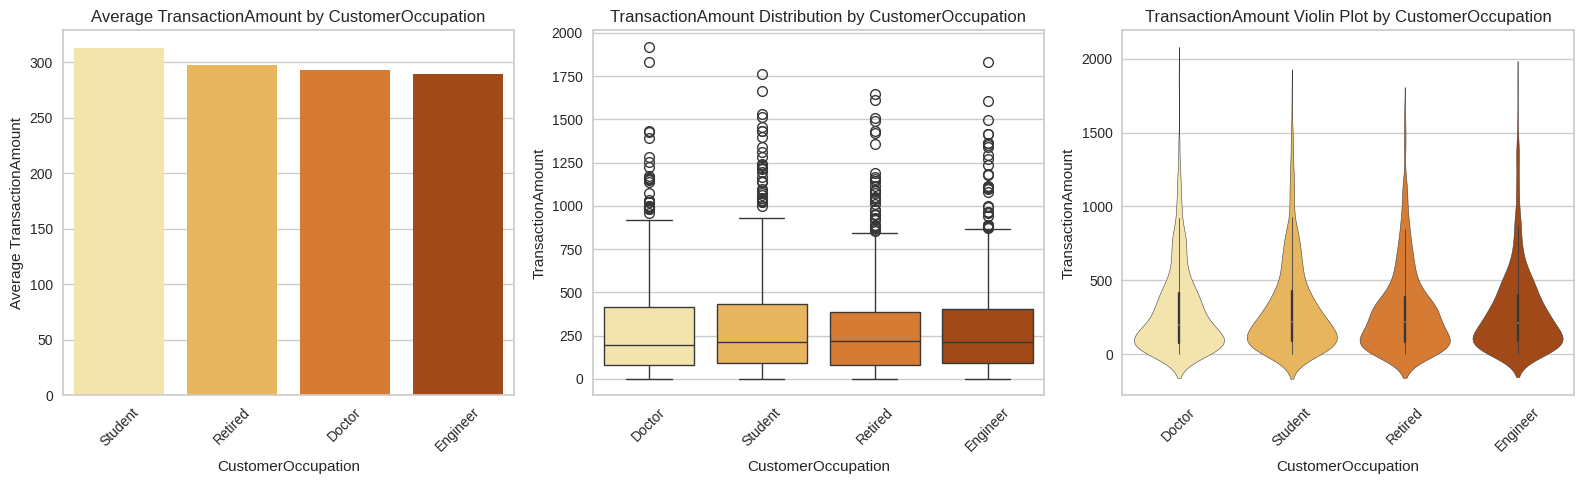

In [92]:
plot_categorical_relationships('CustomerOccupation')

<ipython-input-93-915a8e7ac702>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-93-915a8e7ac702>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
<ipython-input-93-915a8e7ac702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)


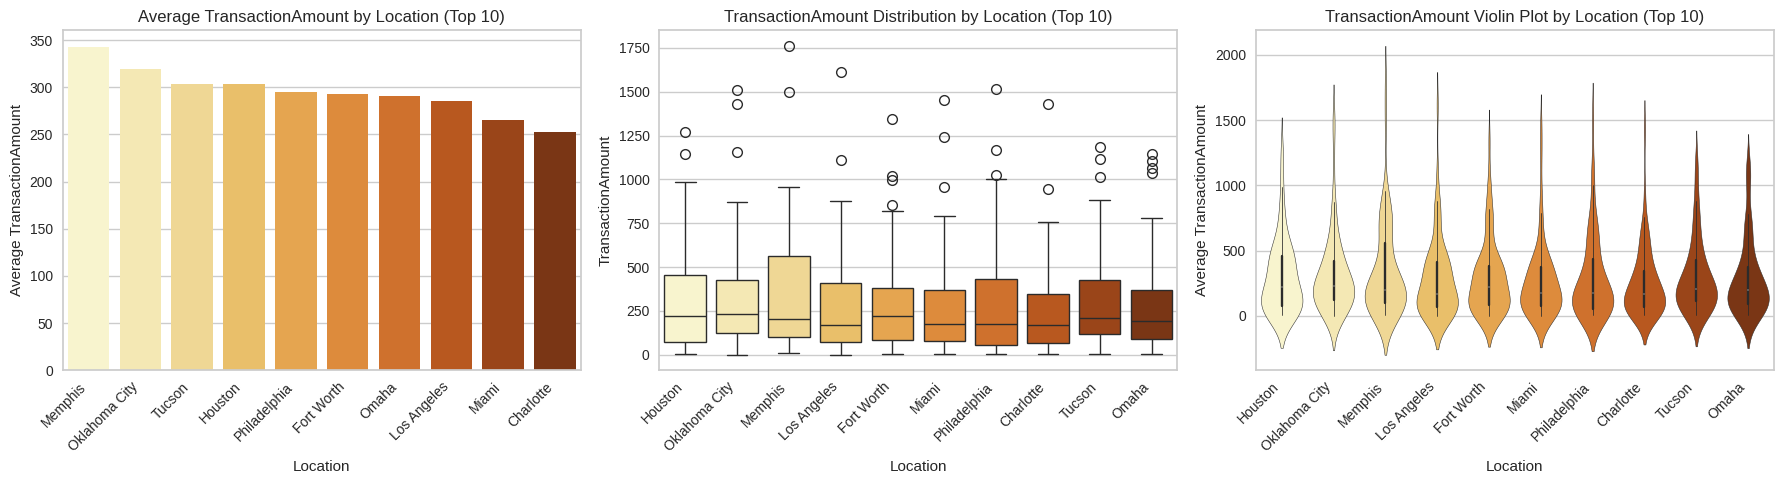

In [93]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15, palette='YlOrBr'):
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_categorical_relationships_improved('Location', top_n=10)

<ipython-input-93-915a8e7ac702>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-93-915a8e7ac702>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
<ipython-input-93-915a8e7ac702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)


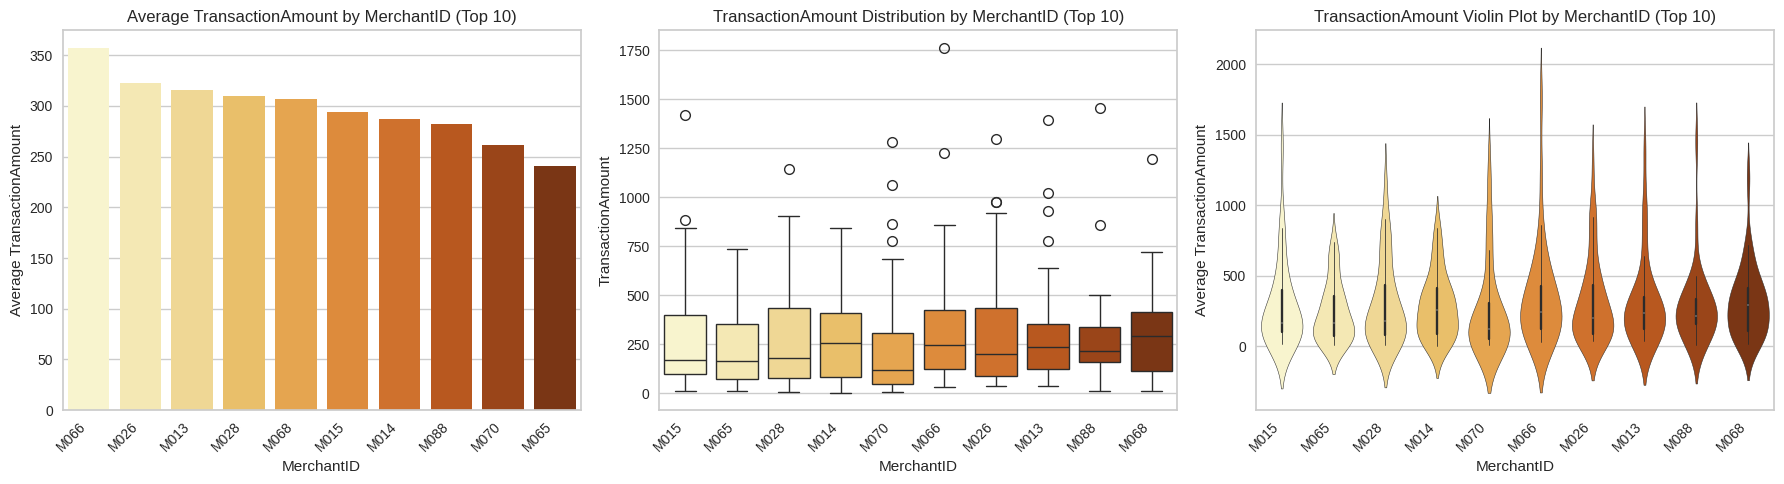

In [94]:
plot_categorical_relationships_improved('MerchantID', top_n=10)

Number of high-value transactions (top 5%): 126


TransactionID AccountID  TransactionAmount      TransactionDate  \
74       TX000075   AC00265            1212.51  2023-10-04 16:36:29   
82       TX000083   AC00236             922.55  2023-01-23 16:32:48   
85       TX000086   AC00098            1340.19  2023-09-29 17:22:10   
110           NaN   AC00068            1045.22  2023-11-22 16:13:39   
129      TX000130   AC00320            1036.66  2023-07-11 16:39:53   

    TransactionType      Location DeviceID      IP Address MerchantID Channel  \
74            Debit  Indianapolis  D000231    193.83.0.183       M036  Branch   
82            Debit       Detroit  D000206    21.97.154.92       M004     ATM   
85           Credit        Austin  D000574  165.114.224.47       M012  Online   
110           Debit      Columbus  D000400    77.7.223.184       M077     ATM   
129           Debit   San Antonio  D000015  53.218.177.171       M062  Branch   

     CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
74          20.0            Student                 24.0            1.0   
82          63.0            Retired                 87.0            1.0   
85          54.0           Engineer                 30.0            1.0   
110         53.0            Retired                 73.0            1.0   
129         58.0             Doctor                144.0            1.0   

     AccountBalance PreviousTransactionDate  
74           605.95     2024-11-04 08:06:51  
82          4715.84     2024-11-04 08:11:07  
85          8654.28     2024-11-04 08:06:53  
110         1829.90     2024-11-04 08:07:35  
129         5541.57     2024-11-04 08:09:24

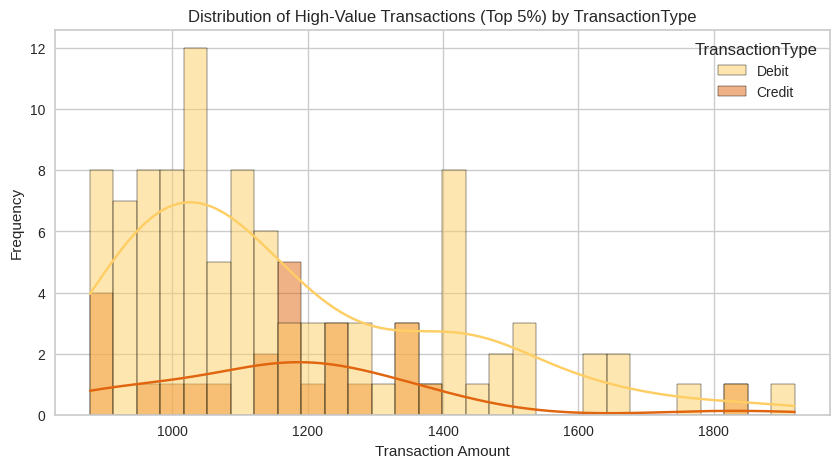

In [95]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

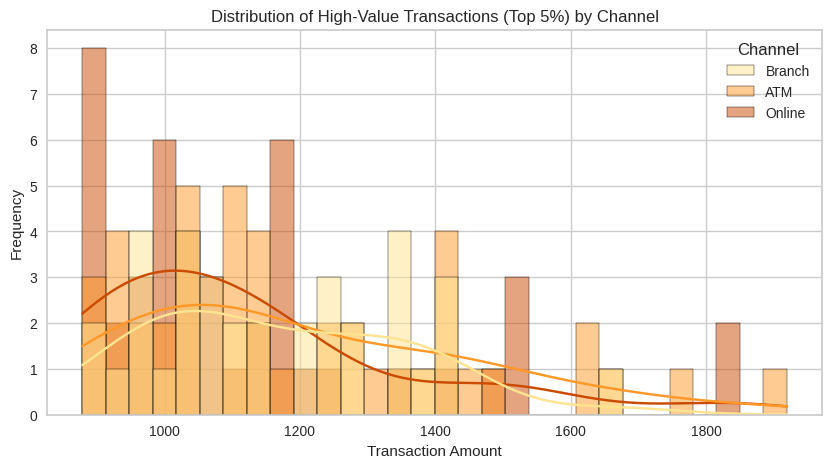

In [96]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

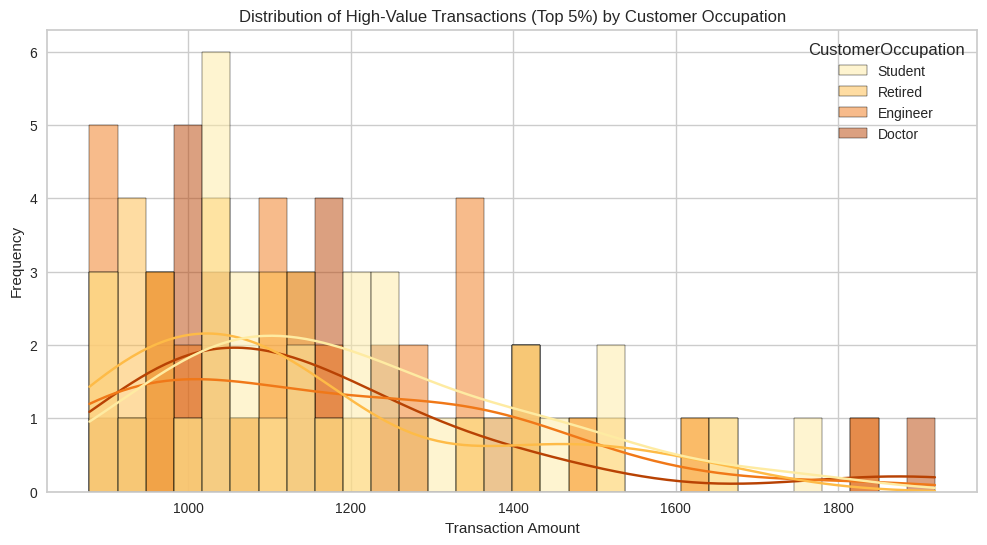

In [97]:
# Plotting high-value transactions with 'CustomerOccupation' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='CustomerOccupation', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Customer Occupation')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

- Multivariate Analysis

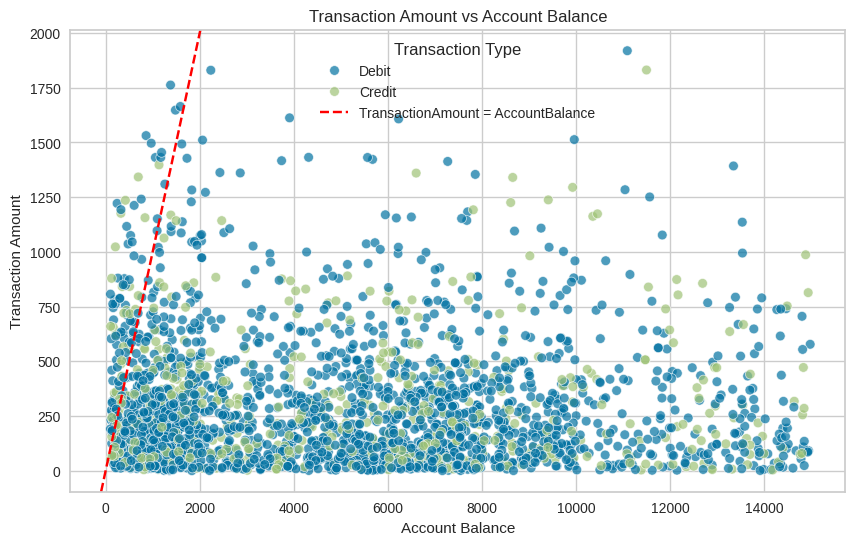

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.7)

# Menambahkan garis referensi untuk batas saldo
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='TransactionAmount = AccountBalance')

# Menambahkan label dan judul
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.grid(True)

# Menampilkan plot
plt.show()

Terlihat pada scatter plot di atas bagian garis merah ke kiri, terdapat beberapa transaksi dengan tipe Debit yang mencurigakan karena TransactionAmount > AccountBalance. Mari kita telusuri seberapa banyak data anomali.

In [99]:
# Menandai transaksi debit yang melebihi saldo
anomalies = df[(df['TransactionType'] == 'Debit') & (df['TransactionAmount'] > df['AccountBalance'])]
print('Banyaknya anomali:', len(anomalies), 'data')

Banyaknya anomali: 86 data


<ipython-input-100-2bb01e77206c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=anomalies, palette='Blues')


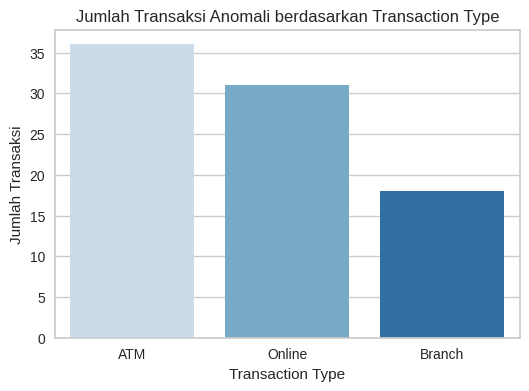

In [100]:
# Mengatur ukuran plot
plt.figure(figsize=(6, 4))

# Bar plot untuk TransactionType
sns.countplot(x='Channel', data=anomalies, palette='Blues')

# Menambahkan judul
plt.title('Jumlah Transaksi Anomali berdasarkan Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Jumlah Transaksi')

# Menampilkan plot
plt.show()

In [101]:
# Show the top 5 accounts involved in anomalous data.
anomalies.value_counts('AccountID', ascending=False).head(5)

AccountID
AC00014    2
AC00285    2
AC00284    2
AC00182    2
AC00128    2
Name: count, dtype: int64

In [102]:
# Show the top 5 accounts involved in anomalous data.
anomalies.value_counts('Location', ascending=False).head(5)

Location
Memphis        6
Boston         4
Denver         4
Kansas City    4
Los Angeles    4
Name: count, dtype: int64

### **5. Korelasi Antar Fitur**

Melihat korelasi antar fitur numerik dapat memberikan wawasan tentang hubungan linear antara mereka. Kita bisa menggunakan heatmap untuk visualisasinya.

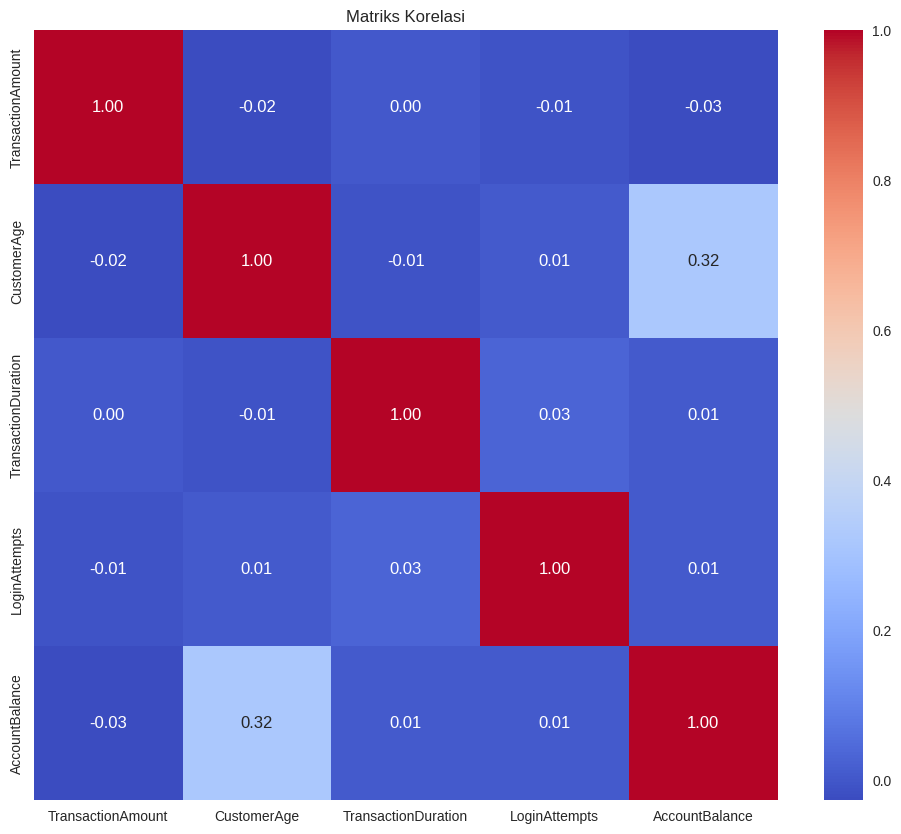

In [103]:
# Drop the 'TransactionID' column before calculating correlation
df_numeric = df.drop('TransactionID', axis=1)

# Select only numeric columns before calculating correlation
df_numeric = df_numeric.select_dtypes(include=np.number)

# Calculate the correlation matrix on the DataFrame containing only numeric columns
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# **4. Pembersihan Dataset**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### **1. Menghapus atau Menangani Data Kosong (Missing Values).**

In [104]:
date_columns = ['TransactionDate', 'PreviousTransactionDate']
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [105]:
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


### **2. Feature Engineering.**

In [106]:
# Feature Engineering
df['TransactionGapDate'] = (df['PreviousTransactionDate'] - df['TransactionDate'] ).dt.days

# Device and IP Usage
df['DeviceUsage'] = df.groupby('DeviceID')['TransactionID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['TransactionID'].transform('count')

# Amount Ratio
df['AmountRatio'] = df['TransactionAmount'] / df['AccountBalance']
df['TotalSaldo'] = df.apply(
    lambda row: row['AccountBalance'] + row['TransactionAmount'] if row['TransactionType'] == 'Credit' else row['AccountBalance'] - row['TransactionAmount'],
    axis=1
)

# Merchant Preferences
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')
df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   TransactionDuration LoginAttempts  AccountBalance  PreviousTransactionDate  \
0                 81.0           1.0         5112.21      2024-11-04 08:08:08   
1                141.0           1.0        13758.91      2024-11-04 08:09:35   
2                 56.0           1.0         1122.35      2024-11-04 08:07:04   
3                 25.0           1.0         8569.06      2024-11-04 08:09:06   
4                198.0           1.0         7429.40      2024-11-04 08:06:39   

   TransactionGapDate DeviceUsage  IPUsage  AmountRatio  TotalSaldo  \
0               572.0         6.0      3.0     0.002756     5098.12   
1               495.0         5.0      4.0     0.027345    13382.67   
2               482.0         5.0      7.0     0.112523      996.06   
3               548.0         5.0      8.0     0.021531     8384.56   
4               384.0         3.0      4.0     0.001810     7442.85   

   MerchantPreference  
0                 1.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0  

[5 rows x 22 columns]

In [107]:
df[df['AccountBalance'] < df['TransactionAmount']]

TransactionID AccountID  TransactionAmount     TransactionDate  \
13        TX000014   AC00264             781.76 2023-11-20 16:39:15   
33        TX000034   AC00359             877.81 2023-03-13 17:23:24   
48        TX000049   AC00296             626.90 2023-11-27 16:45:57   
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
107       TX000108   AC00397             756.59 2023-03-06 16:47:02   
...            ...       ...                ...                 ...   
2453      TX002454   AC00222             190.90 2023-10-09 16:17:07   
2470      TX002471   AC00128             425.91 2023-03-24 16:34:27   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   
2515      TX001348   AC00455             787.41 2023-06-19 16:22:28   
2521      TX000884   AC00448             183.32 2023-05-10 16:27:51   

     TransactionType      Location DeviceID       IP Address MerchantID  \
13             Debit       Memphis  D000054     193.83.0.183       M025   
33             Debit   Los Angeles  D000111   134.140.85.231       M094   
48             Debit        Denver  D000284    93.146.251.20       M023   
74             Debit  Indianapolis  D000231     193.83.0.183       M036   
107            Debit    Sacramento  D000028     174.61.77.54       M012   
...              ...           ...      ...              ...        ...   
2453           Debit           NaN  D000390     42.61.10.112       M002   
2470           Debit  Jacksonville  D000412  177.116.108.246       M038   
2511          Credit  Jacksonville  D000215    59.127.135.25       M041   
2515           Debit       Memphis  D000351    150.25.200.56       M081   
2521           Debit       Raleigh  D000450   162.207.77.170       M041   

     Channel  ...  TransactionDuration LoginAttempts  AccountBalance  \
13       ATM  ...                123.0           1.0          189.69   
33    Online  ...                150.0           1.0          399.00   
48    Online  ...                138.0           1.0          265.51   
74    Branch  ...                 24.0           1.0          605.95   
107   Branch  ...                 17.0           1.0          420.65   
...      ...  ...                  ...           ...             ...   
2453  Online  ...                 40.0           1.0          101.25   
2470     ATM  ...                 47.0           1.0          383.58   
2511  Online  ...                 93.0           1.0          131.25   
2515  Online  ...                 39.0           1.0          300.87   
2521     ATM  ...                 74.0           1.0          137.42   

      PreviousTransactionDate  TransactionGapDate DeviceUsage  IPUsage  \
13        2024-11-04 08:07:06               349.0         4.0      5.0   
33        2024-11-04 08:07:50               601.0         3.0      6.0   
48        2024-11-04 08:07:24               342.0         4.0      5.0   
74        2024-11-04 08:06:51               396.0         3.0      5.0   
107       2024-11-04 08:11:40               608.0         4.0      6.0   
...                       ...                 ...         ...      ...   
2453      2024-11-04 08:10:27               391.0         3.0      5.0   
2470      2024-11-04 08:07:14               590.0         3.0      6.0   
2511      2024-11-04 08:07:49               628.0         6.0      5.0   
2515      2024-11-04 08:06:44               503.0         4.0      4.0   
2521      2024-11-04 08:09:31               543.0         5.0      4.0   

      AmountRatio  TotalSaldo  MerchantPreference  
13       4.121250     -592.07                 1.0  
33       2.200025     -478.81                 1.0  
48       2.361116     -361.39                 1.0  
74       2.001007     -606.56                 2.0  
107      1.798621     -335.94                 1.0  
...           ...         ...                 ...  
2453     1.885432      -89.65                 1.0  
2470     1.110355      -42.33                 1.0  
2511     1.852038      374.33

### **3. Menghapus Atribut Yang Tidak Perlu**

In [108]:
# drop unnecessary attributes
df.drop(['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'IP Address'], axis=1, inplace=True)
df.head()

TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online          NaN   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  TotalSaldo  \
0               572.0          6.0      3.0     0.002756     5098.12   
1               495.0          5.0      4.0     0.027345    13382.67   
2               482.0          5.0      7.0     0.112523      996.06   
3               548.0          5.0      8.0     0.021531     8384.56   
4               384.0          3.0      4.0     0.001810     7442.85   

   MerchantPreference  
0                 1.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0

# **5. Data Preprocessing**

### **1. Binning Data**

In [109]:
# Menentukan jumlah bin (misalnya, 4 bin dengan jumlah data yang sama)
num_bins = 4
labels = ['Low', 'Medium', 'High', 'Very High']

# Melakukan binning dengan distribusi yang sama
df['Binned_Amount'] = pd.qcut(df['TransactionAmount'], q=num_bins, labels=labels)

# Cek hasil
df[['TransactionAmount', 'Binned_Amount']].head()

TransactionAmount Binned_Amount
0              14.09           Low
1             376.24          High
2             126.29        Medium
3             184.50        Medium
4              13.45           Low

### **2. Encoding Data Kategorikal**

In [110]:
# Select features for clustering
X = df.copy()
X

TransactionAmount TransactionType          Location Channel  \
0                 14.09           Debit         San Diego     ATM   
1                376.24           Debit           Houston     ATM   
2                126.29           Debit              Mesa  Online   
3                184.50           Debit           Raleigh  Online   
4                 13.45          Credit           Atlanta  Online   
...                 ...             ...               ...     ...   
2532             230.08           Debit            Austin  Online   
2533             561.58           Debit        Sacramento  Online   
2534             493.11           Debit  Colorado Springs  Branch   
2535             198.62          Credit            Tucson  Branch   
2536               7.49          Credit           Houston  Online   

      CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0            70.0             Doctor                 81.0            1.0   
1            68.0             Doctor                141.0            1.0   
2            19.0            Student                 56.0            1.0   
3            26.0            Student                 25.0            1.0   
4             NaN            Student                198.0            1.0   
...           ...                ...                  ...            ...   
2532         79.0            Retired                124.0            1.0   
2533         65.0             Doctor                 23.0            1.0   
2534         53.0            Retired                236.0            1.0   
2535         27.0            Student                 84.0            1.0   
2536         65.0            Retired                276.0            1.0   

      AccountBalance  TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  \
0            5112.21               572.0          6.0      3.0     0.002756   
1           13758.91               495.0          5.0      4.0     0.027345   
2            1122.35               482.0          5.0      7.0     0.112523   
3            8569.06               548.0          5.0      8.0     0.021531   
4            7429.40               384.0          3.0      4.0     0.001810   
...              ...                 ...          ...      ...          ...   
2532         4466.10               552.0          6.0      6.0     0.051517   
2533        11748.86               499.0          3.0      4.0     0.047799   
2534         7432.99               461.0          8.0      4.0     0.066341   
2535         1196.07               538.0          4.0      5.0     0.166061   
2536         3634.67               380.0          7.0      8.0     0.002061   

      TotalSaldo  MerchantPreference Binned_Amount  
0        5098.12                 1.0           Low  
1       13382.67                 1.0          High  
2         996.06                 1.0        Medium  
3        8384.56                 1.0        Medium  
4        7442.85                 1.0           Low  
...          ...                 ...           ...  
2532     4236.02                 2.0          High  
2533    11187.28                 2.0     Very High  
2534     6939.88                 2.0     Very High  
2535     1394.69                 1.0        Medium  
2536     3642.16                 2.0           Low  

[2537 rows x 16 columns]

In [111]:
# encoding categorical data
cat_col = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()

for col in cat_col:
    X[col] = label_encoder.fit_transform(X[col])
X.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              13.45                0         1        2          NaN   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                 81.0            1.0         5112.21   
1                   0                141.0            1.0        13758.91   
2                   3                 56.0            1.0         1122.35   
3                   3                 25.0            1.0         8569.06   
4                   3                198.0            1.0         7429.40   

   TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  TotalSaldo  \
0               572.0          6.0      3.0     0.002756     5098.12   
1               495.0          5.0      4.0     0.027345    13382.67   
2               482.0          5.0      7.0     0.112523      996.06   
3               548.0          5.0      8.0     0.021531     8384.56   
4               384.0          3.0      4.0     0.001810     7442.85   

   MerchantPreference  Binned_Amount  
0                 1.0              1  
1                 1.0              0  
2                 1.0              2  
3                 1.0              2  
4                 1.0              1

### **3. Feature Scaling**

In [112]:
# Standardize the data numerical

scaler = RobustScaler() # scaler yang mengatasi outlier
num_col = X.select_dtypes(include=['int64', 'float64']).columns

for col in num_col:
    X[col] = scaler.fit_transform(X[[col]])

X_scaled = X.copy()
X_scaled.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.594554              0.0  0.714286     -0.5      0.78125   
1           0.496933              0.0 -0.285714     -0.5      0.71875   
2          -0.256393              0.0  0.095238      0.5     -0.81250   
3          -0.080954              0.0  0.571429      0.5     -0.59375   
4          -0.596483             -1.0 -0.952381      0.5          NaN   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                -1.0            -0.316327            0.0        0.061301   
1                -1.0             0.295918            0.0        1.463174   
2                 0.5            -0.571429            0.0       -0.585568   
3                 0.5            -0.887755            0.0        0.621753   
4                 0.5             0.877551            0.0        0.436982   

   TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  TotalSaldo  \
0            0.467742     0.666667     -1.0    -0.367447    0.087546   
1            0.053763     0.333333     -0.5    -0.182975    1.421148   
2           -0.016129     0.333333      1.0     0.456045   -0.572781   
3            0.338710     0.333333      1.5    -0.226595    0.616579   
4           -0.543011    -0.333333     -0.5    -0.374543    0.464988   

   MerchantPreference  Binned_Amount  
0                 0.0           -0.5  
1                 0.0           -1.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0           -0.5

### **4. Matriks Korelasi**

In [113]:
# correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
correlation_matrix

TransactionAmount  TransactionType  Location   Channel  \
TransactionAmount             1.000000        -0.021751  0.012356 -0.009371   
TransactionType              -0.021751         1.000000 -0.030147 -0.193721   
Location                      0.012356        -0.030147  1.000000  0.003805   
Channel                      -0.009371        -0.193721  0.003805  1.000000   
CustomerAge                  -0.024428        -0.046743 -0.031744 -0.007017   
CustomerOccupation            0.019234        -0.009400 -0.007365 -0.001959   
TransactionDuration           0.004782         0.008233 -0.018512 -0.009423   
LoginAttempts                -0.007397        -0.026698 -0.018114  0.011845   
AccountBalance               -0.026310        -0.023782 -0.008364  0.010898   
TransactionGapDate           -0.022174         0.033774 -0.005705 -0.035691   
DeviceUsage                  -0.027884        -0.007824  0.018002  0.001969   
IPUsage                      -0.004522        -0.026533  0.012385 -0.002854   
AmountRatio                   0.391699        -0.025519 -0.000945  0.011099   
TotalSaldo                   -0.066747        -0.085363 -0.006778  0.022399   
MerchantPreference           -0.033630         0.036068  0.039879  0.000176   
Binned_Amount                 0.505144         0.002794  0.024263  0.007231   

                     CustomerAge  CustomerOccupation  TransactionDuration  \
TransactionAmount      -0.024428            0.019234             0.004782   
TransactionType        -0.046743           -0.009400             0.008233   
Location               -0.031744           -0.007365            -0.018512   
Channel                -0.007017           -0.001959            -0.009423   
CustomerAge             1.000000           -0.364189            -0.009852   
CustomerOccupation     -0.364189            1.000000            -0.005624   
TransactionDuration    -0.009852           -0.005624             1.000000   
LoginAttempts           0.007876           -0.006102             0.030076   
AccountBalance          0.321161           -0.656612             0.006859   
TransactionGapDate     -0.026085           -0.001550            -0.022653   
DeviceUsage            -0.001781            0.012288             0.012982   
IPUsage                -0.011609            0.011014            -0.012888   
AmountRatio            -0.238212            0.252789             0.001820   
TotalSaldo              0.324888           -0.653917             0.011651   
MerchantPreference      0.014839           -0.024063            -0.033670   
Binned_Amount          -0.044786            0.000660             0.012711   

                     LoginAttempts  AccountBalance  TransactionGapDate  \
TransactionAmount        -0.007397       -0.026310           -0.022174   
TransactionType          -0.026698       -0.023782            0.033774   
Location                 -0.018114       -0.008364           -0.005705   
Channel                   0.011845        0.010898           -0.035691   
CustomerAge               0.007876        0.321161           -0.026085   
CustomerOccupation       -0.006102       -0.656612           -0.001550   
TransactionDuration       0.030076        0.006859           -0.022653   
LoginAttempts             1.000000        0.009088            0.012981   
AccountBalance            0.009088        1.000000           -0.021826   
TransactionGapDate        0.012981       -0.021826            1.000000   
DeviceUsage               0.000534       -0.021954           -0.003371   
IPUsage                  -0.028018       -0.016655           -0.004532   
AmountRatio              -0.006757       -0.362597            0.013024   
TotalSaldo                0.017843        0.995173           -0.025087   
MerchantPreference       -0.035462       -0.009705           -0.005586   
Binned_Amount             0.009200        0.011424           -0.009693   

                     DeviceUsage   IPUsage  AmountRatio  TotalSaldo  \
TransactionAmount      -0.027884 -0.0

# **6. Menentukan Jumlah Cluster**

Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan KElbowVisualizer().

In [114]:
kmeans = KMeans(init='k-means++', max_iter=300, n_init=20)

Checking for NaNs in X_scaled before fitting:
TransactionAmount      26
TransactionType         0
Location                0
Channel                 0
CustomerAge            18
CustomerOccupation      0
TransactionDuration    26
LoginAttempts          21
AccountBalance         27
TransactionGapDate     52
DeviceUsage            30
IPUsage                20
AmountRatio            52
TotalSaldo             52
MerchantPreference     44
Binned_Amount           0
dtype: int64

Shape of X_scaled before dropping NaNs: (2537, 16)
Shape of X_scaled after dropping NaNs: (2284, 16)


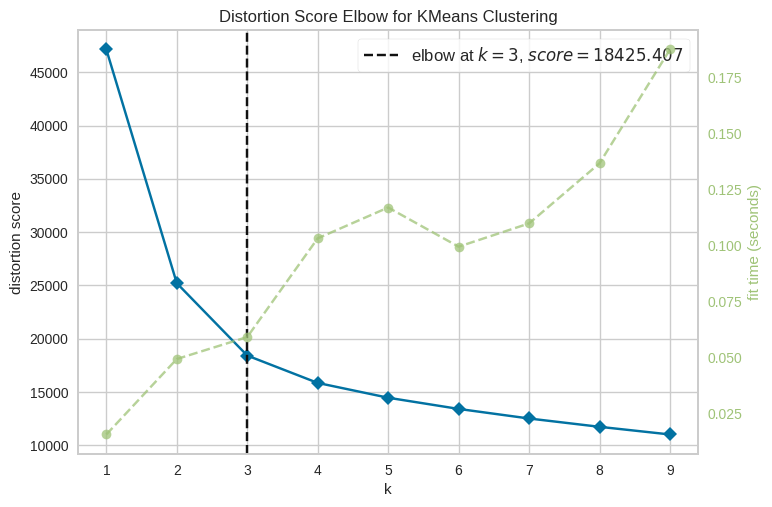

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Cek apakah X_scaled mengandung NaN setelah scaling dan feature engineering
print("Checking for NaNs in X_scaled before fitting:")
print(X_scaled.isnull().sum())

# Handle NaNs by dropping rows containing missing values
# Alternatively, imputation could be used depending on the desired approach
X_scaled_cleaned = X_scaled.dropna()

# Check the shape after dropping NaNs
print(f"\nShape of X_scaled before dropping NaNs: {X_scaled.shape}")
print(f"Shape of X_scaled after dropping NaNs: {X_scaled_cleaned.shape}")

# Fit visualizer dengan data bersih untuk menemukan jumlah cluster optimal
visualizer.fit(X_scaled_cleaned)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Grafik Elbow menunjukkan Distortion Score (WCSS) terhadap jumlah cluster (k). Kita mencari "elbow" atau titik di mana penurunan skor distorsi mulai melambat secara signifikan.

  - Terlihat bahwa penurunan skor distorsi cukup curam dari k=1 ke k=2, dan kemudian ke k=3.
  - Setelah k=3, penurunan skor distorsi terlihat mulai melandai.
  - Garis vertikal putus-putus menunjukkan potensi "elbow" berada pada k=3, dengan skor distorsi sekitar 18425.

**Kesimpulan dari Metode Elbow**: Berdasarkan grafik ini, jumlah cluster yang optimal kemungkinan adalah 3.

# **7. Membangun Model Clustering**

In [116]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20)
# Use the cleaned data X_scaled_cleaned which has no NaNs
kmeans.fit(X_scaled_cleaned)

# Assign clusters and calculate distance to cluster centroid

# Create a new column for cluster labels in the cleaned dataframe
X_scaled_cleaned['Cluster'] = kmeans.labels_

# Calculate the distance to the centroid for each data point in the cleaned data
# Ensure the column order matches the fitted data when calculating distance
distance_data = X_scaled_cleaned.drop(columns=['Cluster']) # Drop the temporary 'Cluster' column for distance calculation
# Use the cluster labels from X_scaled_cleaned to get the correct centroid for each point
distance_data['Cluster'] = X_scaled_cleaned['Cluster']

# Calculate distance for the cleaned data
X_scaled_cleaned['DistanceToCentroid'] = np.linalg.norm(
    distance_data.drop(columns=['Cluster']) - kmeans.cluster_centers_[distance_data['Cluster']], axis=1
)


# Merge the cluster assignments and distance back to the original dataframe 'df'
# Use the index to join the dataframes
df = df.merge(X_scaled_cleaned[['Cluster', 'DistanceToCentroid']], left_index=True, right_index=True, how='left')


# Identify potential frauds based on distance threshold
# Calculate the threshold on the distances calculated for the cleaned data
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 115


<ipython-input-116-4d2dca09699f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled_cleaned['Cluster'] = kmeans.labels_
<ipython-input-116-4d2dca09699f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled_cleaned['DistanceToCentroid'] = np.linalg.norm(


TransactionAmount TransactionType          Location Channel  \
9                815.96           Debit         Nashville     ATM   
26               246.93           Debit             Miami     ATM   
33               877.81           Debit       Los Angeles  Online   
47               510.24           Debit     Oklahoma City  Online   
48               626.90           Debit            Denver  Online   
...                 ...             ...               ...     ...   
2317             535.40           Debit         San Diego  Branch   
2348             432.18           Debit         Las Vegas  Branch   
2403            1493.00           Debit  Colorado Springs     ATM   
2514             973.39           Debit        Sacramento  Branch   
2515             787.41           Debit           Memphis  Online   

      CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
9            55.0             Doctor                120.0            1.0   
26           23.0            Student                158.0            5.0   
33           22.0            Student                150.0            1.0   
47           19.0            Student                105.0            1.0   
48           26.0            Student                138.0            1.0   
...           ...                ...                  ...            ...   
2317         23.0            Student                110.0            1.0   
2348         18.0            Student                162.0            1.0   
2403         69.0            Retired                151.0            1.0   
2514         77.0            Retired                296.0            1.0   
2515         25.0            Student                 39.0            1.0   

      AccountBalance  TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  \
9            1021.88               583.0          4.0      6.0     0.798489   
26            673.35               566.0          8.0      5.0     0.366719   
33            399.00               601.0          3.0      6.0     2.200025   
47            781.70               391.0          3.0      7.0     0.652731   
48            265.51               342.0          4.0      5.0     2.361116   
...              ...                 ...          ...      ...          ...   
2317          651.84               541.0          7.0      9.0     0.821367   
2348          678.83               534.0          3.0      5.0     0.636654   
2403         1619.16               515.0          4.0      4.0     0.922083   
2514         2042.22               431.0          5.0      4.0     0.476633   
2515          300.87               503.0          4.0      4.0     2.617110   

      TotalSaldo  MerchantPreference Binned_Amount  Cluster  \
9         205.92                 1.0     Very High      2.0   
26        426.42                 1.0          High      0.0   
33       -478.81                 1.0     Very High      2.0   
47        271.46                 2.0     Very High      0.0   
48       -361.39                 1.0     Very High      2.0   
...          ...                 ...           ...      ...   
2317      116.44                 1.0     Very High      2.0   
2348      246.65                 1.0     Very High      0.0   
2403      126.16                 1.0     Very High      2.0   
2514     1068.83                 2.0     Very High      0.0   
2515     -486.54                 2.0     Very High      2.0   

      DistanceToCentroid  
9               4.856865  
26              4.887881  
33              6.148491  
47              4.859356  
48              7.331912  
...                  ...  
2317            5.001851  
2348            4.506362  
2403            4.603853  
2514            4.459771  
2515            9.267128  

[115 rows x 18 columns]

In [117]:
# Calculate silhouette score using the cleaned data X_scaled_cleaned
# and the cluster labels assigned to X_scaled_cleaned
silhouette_avg1 = silhouette_score(X_scaled_cleaned, X_scaled_cleaned['Cluster'])
print(f"For n_clusters = 3, the average silhouette_score is : {silhouette_avg1}")

For n_clusters = 3, the average silhouette_score is : 0.6467275980329831


**Kesimpulan dari Silhouette Score**: Untuk 3 cluster, rata-rata Silhouette Score adalah sekitar 0.641. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa objek lebih cocok dengan clusternya sendiri dan kurang mirip dengan cluster lain. Skor 0.641 menunjukkan hasil clustering yang cukup baik.

# **8. Penilaian (Opsional)**

### **a. Feature Selection**

In [118]:
# select features with variance threshold
selector = VarianceThreshold(threshold=0.5) # Robust Scaler witout Binning

# Apply feature selection on the cleaned data X_scaled_cleaned
df_num_sel = selector.fit_transform(X_scaled_cleaned)
X_new = pd.DataFrame(df_num_sel)
X_new.head()

0         1    2         3         4
0 -0.594554 -0.316327 -1.0 -0.367447  2.188391
1  0.496933  0.295918 -0.5 -0.182975  2.503817
2 -0.256393 -0.571429  1.0  0.456045  2.039112
3 -0.080954 -0.887755  1.5 -0.226595  2.389321
4 -0.359288  0.612245 -0.5  0.496289  2.086633

In [119]:
# Get the selected column names from the cleaned data
selected_columns = X_scaled_cleaned.columns[selector.get_support()]
print("Kolom yang terpilih:", selected_columns)

Kolom yang terpilih: Index(['TransactionAmount', 'TransactionDuration', 'IPUsage', 'AmountRatio',
       'DistanceToCentroid'],
      dtype='object')


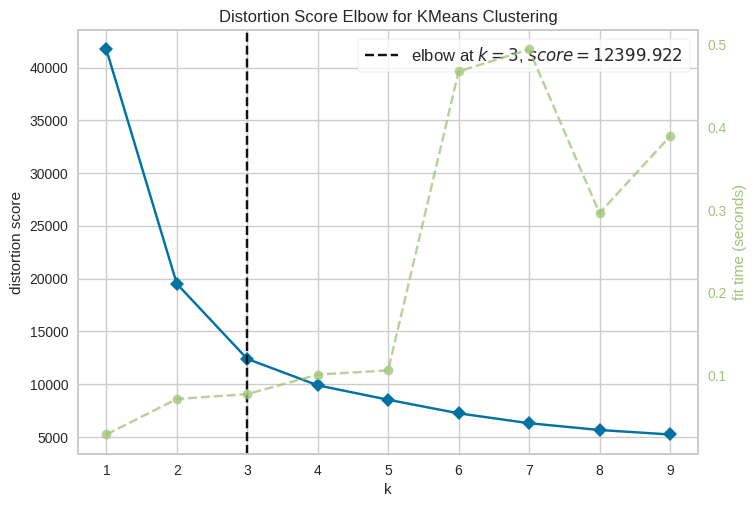

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
# Use the kmeans estimator initialized earlier
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer with the new, cleaned data for finding the optimal number of clusters
visualizer.fit(X_new)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Grafik Elbow ini menunjukkan Distortion Score (WCSS) terhadap jumlah cluster (k) setelah feature selection.

  - Sama seperti sebelumnya, kita mencari titik "elbow". Terlihat bahwa penurunan skor distorsi masih cukup signifikan hingga k=3.
  - Garis vertikal putus-putus menunjukkan potensi "elbow" tetap berada pada k=3, dengan skor distorsi sekitar 12399.922.

**Kesimpulan dari Metode Elbow** (setelah Feature Selection): Metode Elbow masih mengindikasikan bahwa jumlah cluster yang optimal kemungkinan adalah 3. Perhatikan bahwa nilai distortion score pada k=3 menjadi lebih rendah dibandingkan sebelumnya (12399 vs 18425), yang bisa mengindikasikan clustering yang lebih rapat setelah pemilihan fitur.

In [121]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20)
kmeans.fit(X_new)

# Create a temporary DataFrame to hold the cluster labels and distances from the fitted data
results_from_clustering = pd.DataFrame({
    'NewCluster': kmeans.labels_,
    # Calculate distance to cluster centroid for each point in X_new
    'NewDistanceToCentroid': np.linalg.norm(X_new - kmeans.cluster_centers_[kmeans.labels_], axis=1)
}, index=X_new.index) # Use the index of X_new to align with the original data

# Calculate the threshold on the distances from the results_from_clustering DataFrame
# This ensures the column exists before calculating the quantile
threshold = results_from_clustering['NewDistanceToCentroid'].quantile(0.95)

# Merge the results back into the original df DataFrame using the index
# This will add the 'NewCluster' and 'NewDistanceToCentroid' columns
# Rows in df that were dropped during cleaning (and are not in results_from_clustering)
# will get NaN values in these new columns.
df = df.merge(results_from_clustering, left_index=True, right_index=True, how='left')


# Identify potential frauds based on the calculated threshold
# Use the 'NewDistanceToCentroid' column from the merged df
# Rows that had NaN after the merge will not satisfy the condition > threshold, which is correct.
potential_frauds = df[df['NewDistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 115


TransactionAmount TransactionType       Location Channel  CustomerAge  \
12               494.52          Credit           Mesa  Branch         24.0   
31                59.12           Debit      Baltimore     ATM         29.0   
44               304.31           Debit     Louisville  Branch         27.0   
45               435.27           Debit        Chicago  Branch         74.0   
68               117.28          Credit         Austin  Online         60.0   
...                 ...             ...            ...     ...          ...   
2143              75.77           Debit      Charlotte  Branch         51.0   
2203             168.34           Debit        Phoenix     ATM         64.0   
2258              65.01          Credit         Austin  Online         29.0   
2261             340.13           Debit           Mesa  Branch         24.0   
2262              15.81           Debit  Oklahoma City  Branch         69.0   

     CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
12              Student                111.0            1.0         1620.02   
31               Doctor                257.0            1.0         9823.64   
44              Student                 33.0            1.0          868.61   
45              Retired                 90.0            1.0         4673.28   
68             Engineer                 16.0            1.0         3665.77   
...                 ...                  ...            ...             ...   
2143           Engineer                148.0            1.0         8361.70   
2203            Retired                240.0            1.0         7483.01   
2258             Doctor                 67.0            1.0        10235.19   
2261                NaN                 32.0            3.0         1149.74   
2262             Doctor                 11.0            4.0         8384.85   

      TransactionGapDate  DeviceUsage  IPUsage  AmountRatio  TotalSaldo  \
12                 515.0          7.0      5.0     0.305255     2114.54   
31                 636.0          4.0      5.0     0.006018     9764.52   
44                 466.0          4.0      8.0     0.350341      564.30   
45                 396.0          3.0      5.0     0.093140     4238.01   
68                 633.0          6.0      4.0     0.031993     3783.05   
...                  ...          ...      ...          ...         ...   
2143               454.0          NaN      3.0     0.009062     8285.93   
2203               495.0          5.0      NaN     0.022496     7314.67   
2258               376.0          9.0      2.0     0.006352    10300.20   
2261               636.0          9.0      4.0     0.295832      809.61   
2262               612.0          6.0      3.0     0.001886     8369.04   

      MerchantPreference Binned_Amount  Cluster  DistanceToCentroid  \
12                   1.0     Very High      0.0            2.553548   
31                   1.0           Low      0.0            2.552171   
44                   1.0          High      0.0            3.014480   
45                   0.0     Very High      0.0            2.019923   
68                   1.0        Medium      0.0            2.231738   
...                  ...           ...      ...                 ...   
2143                 1.0           Low      NaN                 NaN   
2203                 0.0        Medium      NaN                 NaN   
2258                 1.0           Low      0.0            3.170271   
2261                 1.0          High      0.0            3.657105   
2262                 1.0           Low      0.0            3.767442   

      NewCluster  NewDistanceToCentroid  
12           2.0               4.422532  
31           1.0               7.344289  
44           1.0               4.767139  
45           1.0               8.821680  
68           1.0               5.918007  
...          ...                    ...  
2143         2.0               7.528270  
2203         1.0  

In [122]:
# save potential fraud data

# Menambahkan kolom baru 'is_fraud'
df['PotentialFraud'] = np.where(df['NewDistanceToCentroid'] > threshold, 1, 0)

In [123]:
# Calculate silhouette score using X_new and the labels from kmeans.labels_
silhouette_avg2 = silhouette_score(X_new, kmeans.labels_)
print(f"For n_clusters = 3, the average silhouette_score is : {silhouette_avg2}") # 0.65

For n_clusters = 3, the average silhouette_score is : 0.7148412456244595


In [124]:
# comparison of silhoutte score before and after feature selection

print(f"Silhouette Score Before Feature Selection: {silhouette_avg1}")
print(f"Silhouette Score After Feature Selection: {silhouette_avg2}")

Silhouette Score Before Feature Selection: 0.6467275980329831
Silhouette Score After Feature Selection: 0.7148412456244595


**Kesimpulan dari Silhouette Score** (setelah Feature Selection): Terjadi peningkatan yang signifikan pada Silhouette Score setelah feature selection, dari sekitar 0.641 menjadi sekitar 0.715. Peningkatan ini menunjukkan bahwa kualitas clustering secara keseluruhan menjadi lebih baik setelah fitur-fitur tertentu dipilih. Cluster-cluster menjadi lebih terdefinisi, dengan data poin di dalam setiap cluster menjadi lebih mirip satu sama lain dan lebih berbeda dari data poin di cluster lain.

Berdasarkan hasil evaluasi menggunakan Silhouette Score setelah melakukan feature selection, didapatkan nilai sebesar 0.715. Nilai ini telah melampaui target yang ditetapkan, yaitu 0.70. Silhouette Score yang tinggi menunjukkan bahwa hasil clustering yang diperoleh dengan algoritma K-Means (dan fitur-fitur yang telah diseleksi) memiliki kualitas yang baik, di mana setiap data point cenderung berada dalam cluster yang tepat dengan tingkat kohesi internal cluster yang tinggi dan separasi antar cluster yang jelas.

Mengingat target evaluasi telah tercapai dengan performa model yang memuaskan, eksplorasi algoritma clustering lain saat ini tidak dianggap prioritas. Fokus selanjutnya akan lebih bermanfaat jika diarahkan pada interpretasi hasil clustering yang sudah ada, pemahaman karakteristik setiap cluster yang terbentuk, dan penarikan insight yang relevan dari pengelompokan data tersebut.

Penggunaan algoritma lain akan dipertimbangkan jika hasil saat ini tidak memenuhi kriteria evaluasi yang ditetapkan. Namun, dengan tercapainya target Silhouette Score, model K-Means dengan fitur terseleksi dianggap sudah memberikan representasi pengelompokan data yang memadai untuk tujuan tugas ini.

### **b. Visualisasi Hasil Clustering**

<ipython-input-125-d604803705ad>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(potential_frauds['AmountRatio'], potential_frauds['IPUsage'],


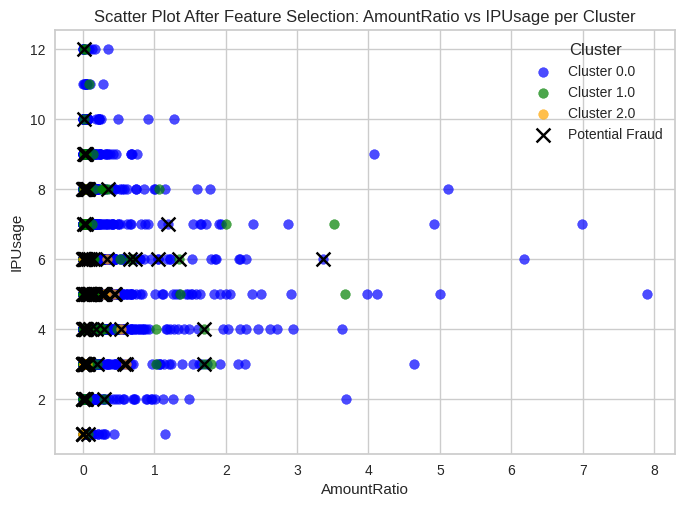

In [125]:
import matplotlib.pyplot as plt

# Menentukan threshold untuk potential frauds
threshold = df['NewDistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['NewDistanceToCentroid'] > threshold]

# Daftar warna untuk setiap cluster
cluster_colors = {
    0: 'blue',
    1: 'green',
    2: 'orange'
}  # Sesuaikan dengan jumlah cluster

# Membuat scatter plot untuk setiap cluster dengan warna custom
for cluster_id, cluster_data in df.groupby('NewCluster'):
    color = cluster_colors.get(cluster_id, 'gray')  # Jika cluster tidak ada dalam dict, gunakan warna default
    plt.scatter(cluster_data['AmountRatio'], cluster_data['IPUsage'],
                color=color, label=f'Cluster {cluster_id}', alpha=0.7)

# Menambahkan titik-titik potential frauds dengan simbol berbeda
plt.scatter(potential_frauds['AmountRatio'], potential_frauds['IPUsage'],
            color='black', edgecolors='black', marker='x', s=100, label='Potential Fraud')

# Menampilkan plot
plt.title('Scatter Plot After Feature Selection: AmountRatio vs IPUsage per Cluster')
plt.xlabel('AmountRatio')
plt.ylabel('IPUsage')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### **c. Analisis dan Interpretasi Hasil Cluster**

In [126]:
features = X.columns
features

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionGapDate', 'DeviceUsage',
       'IPUsage', 'AmountRatio', 'TotalSaldo', 'MerchantPreference',
       'Binned_Amount'],
      dtype='object')

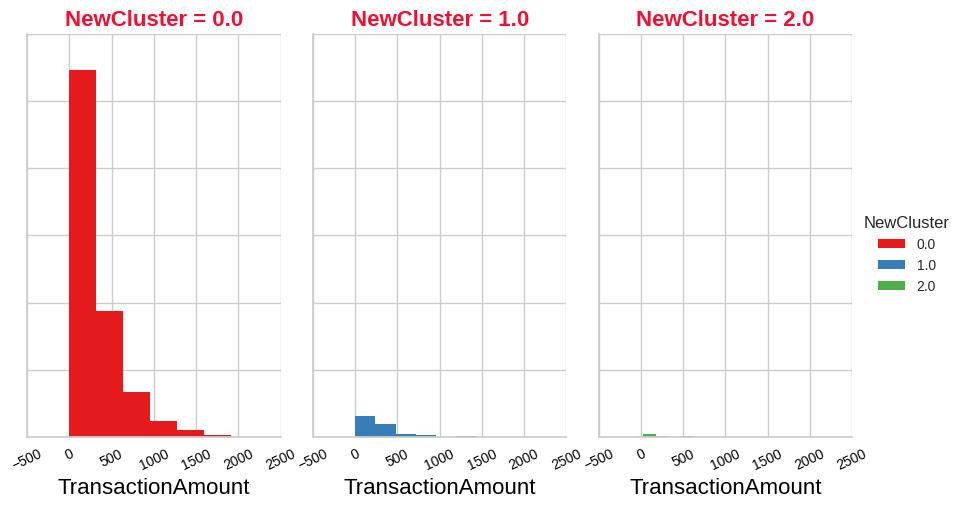

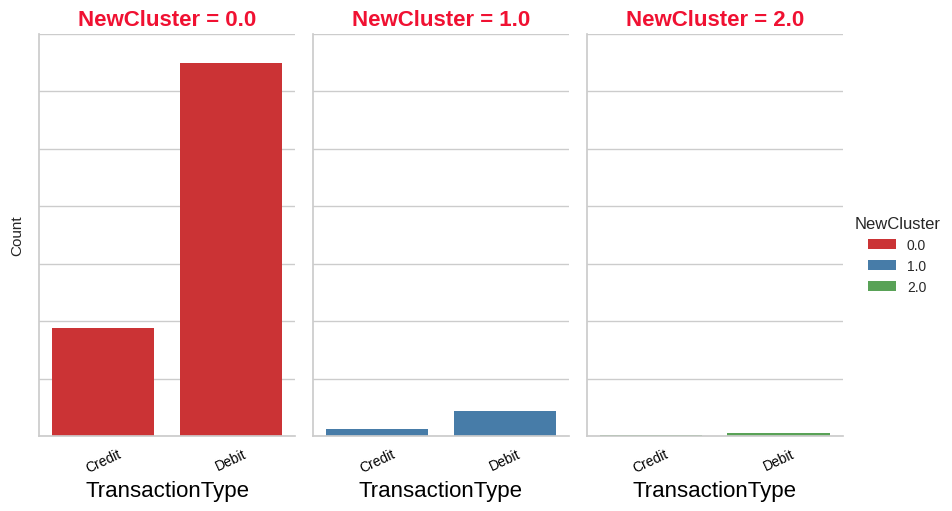

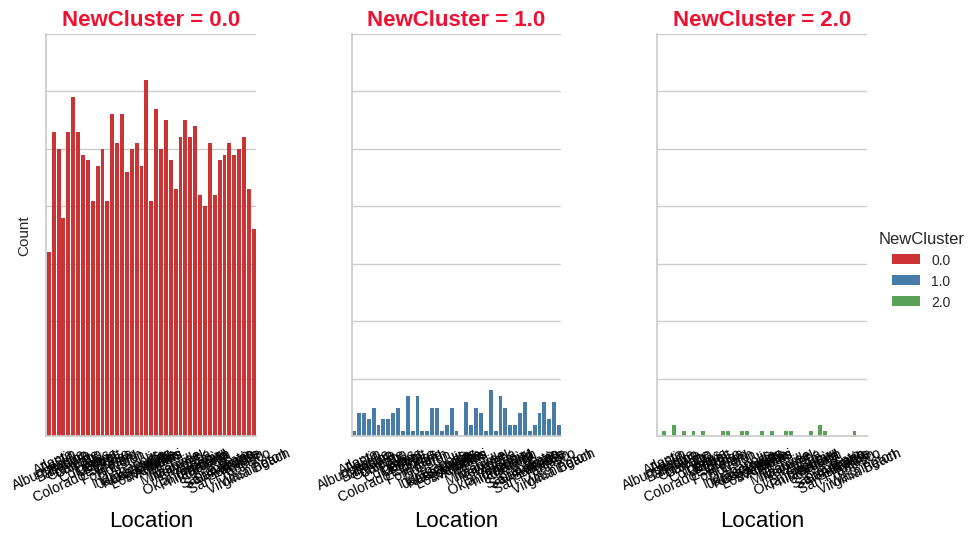

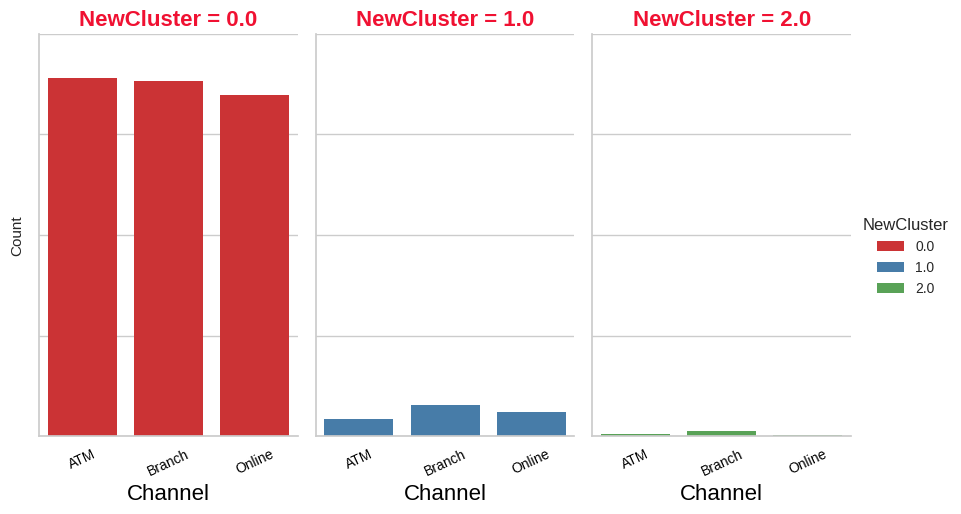

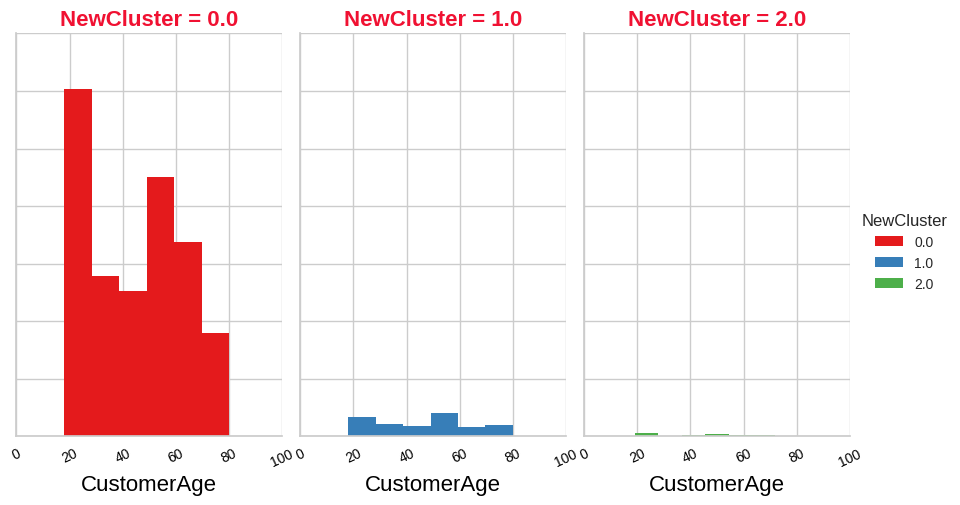

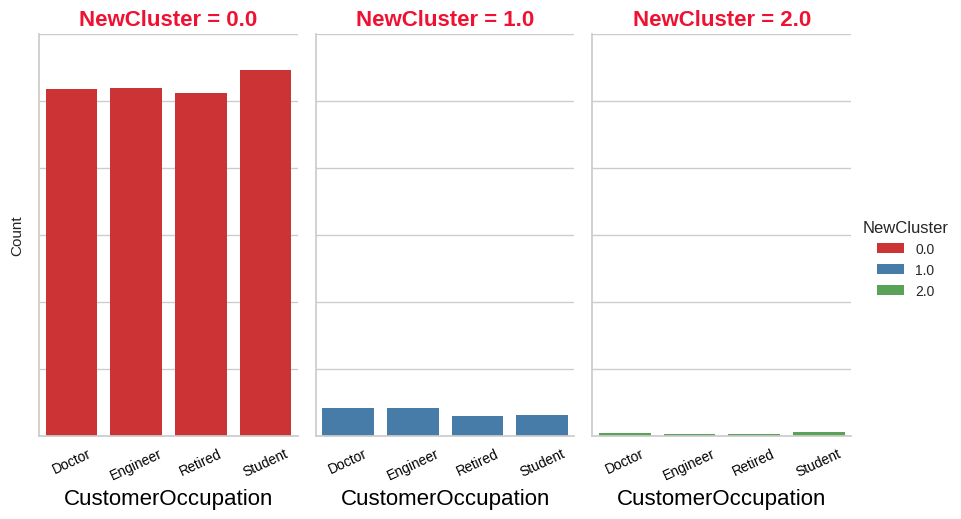

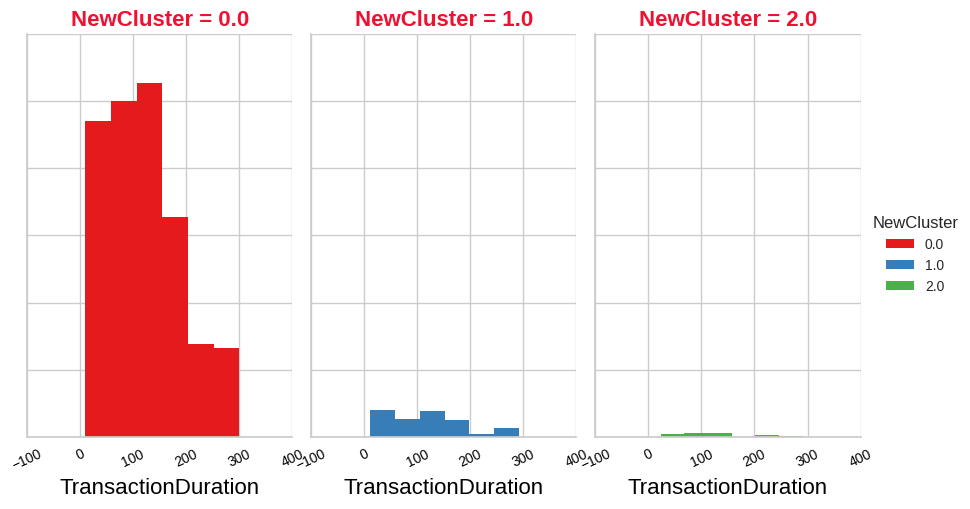

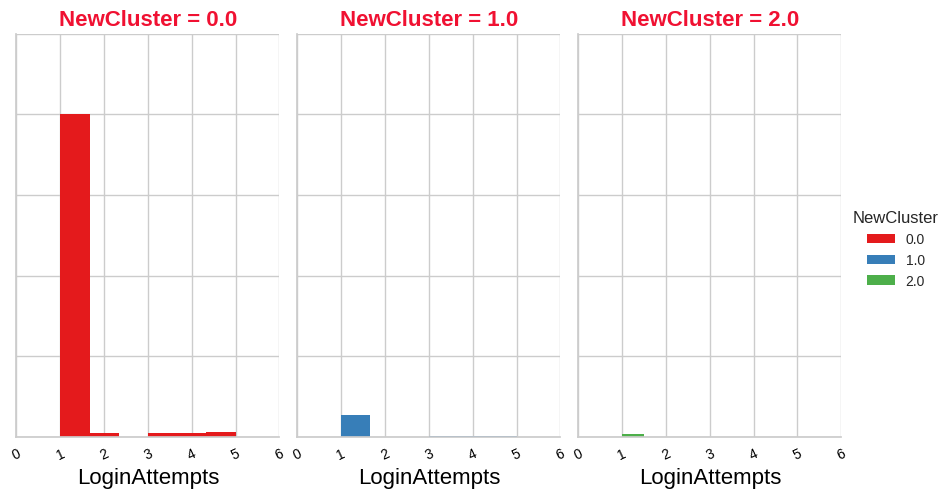

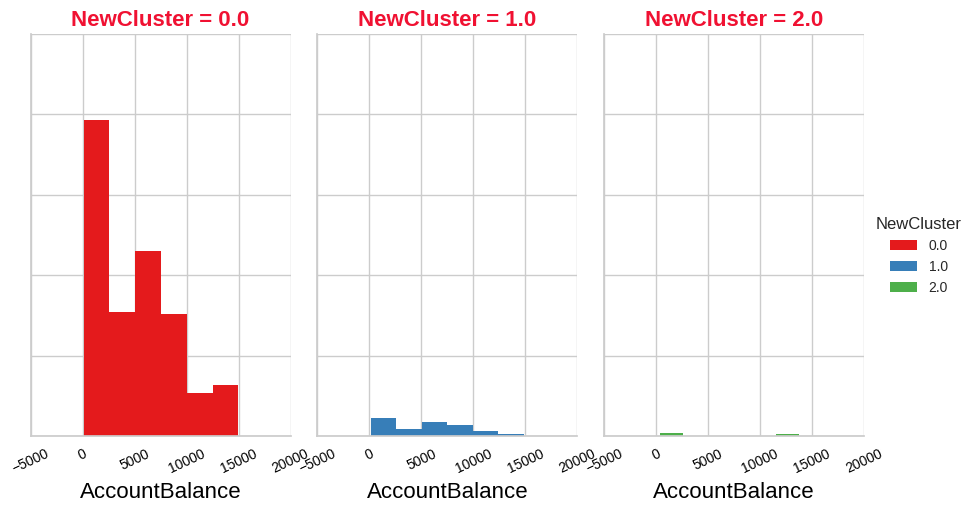

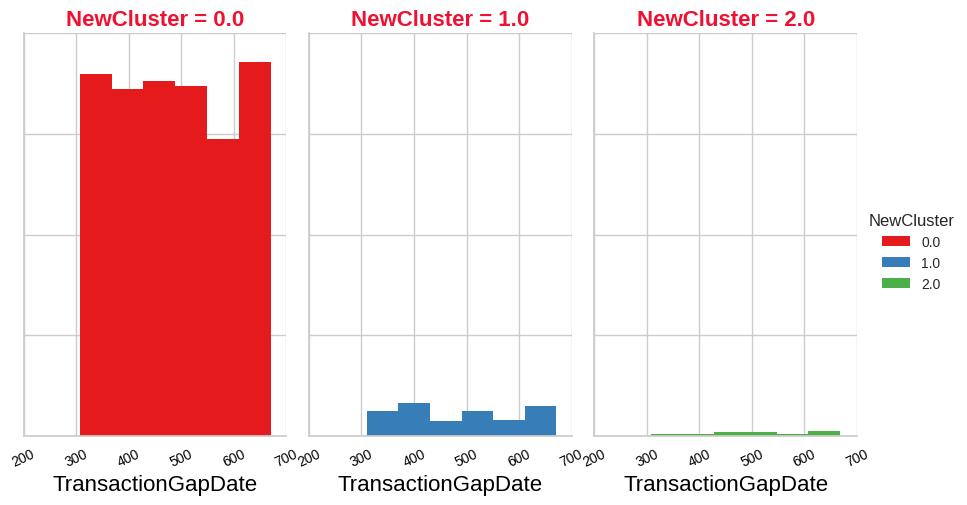

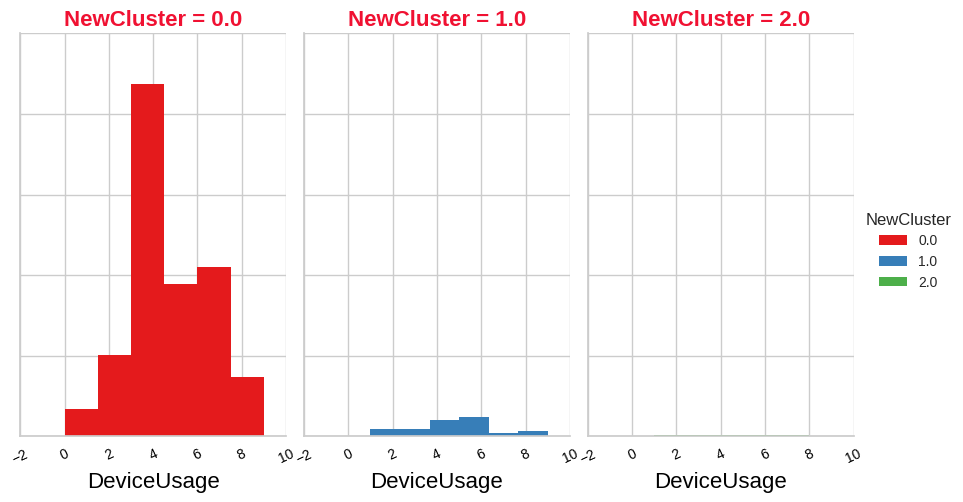

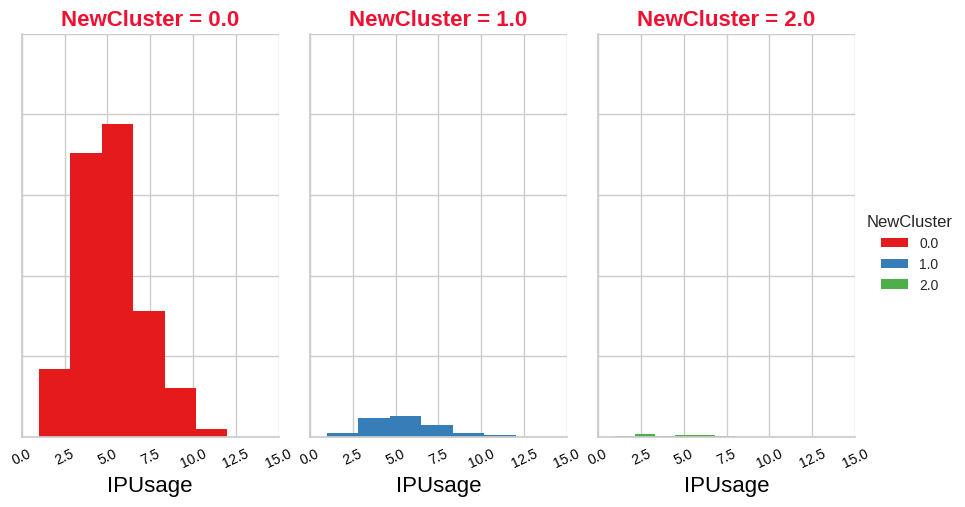

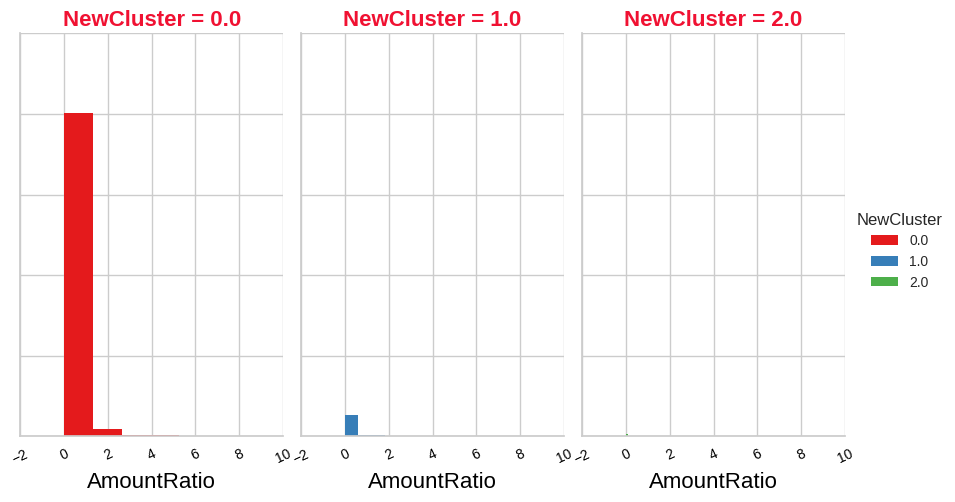

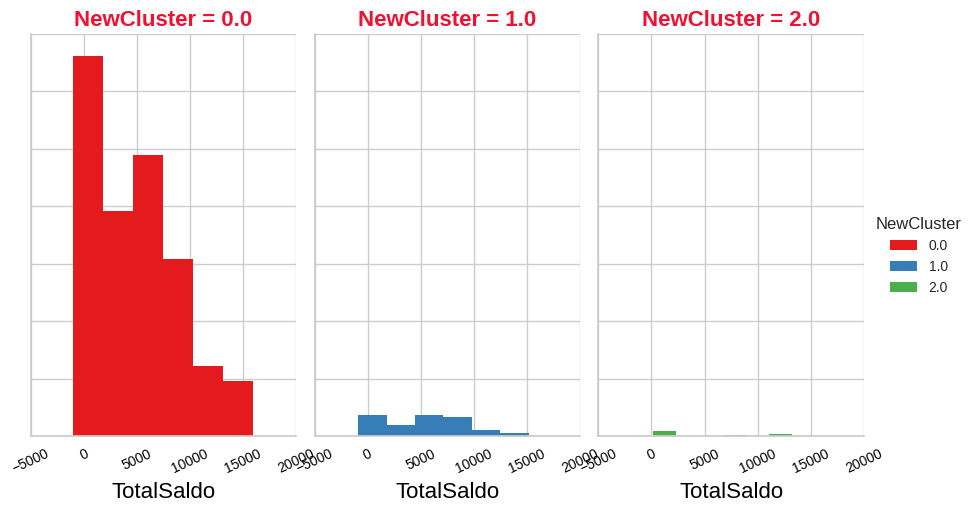

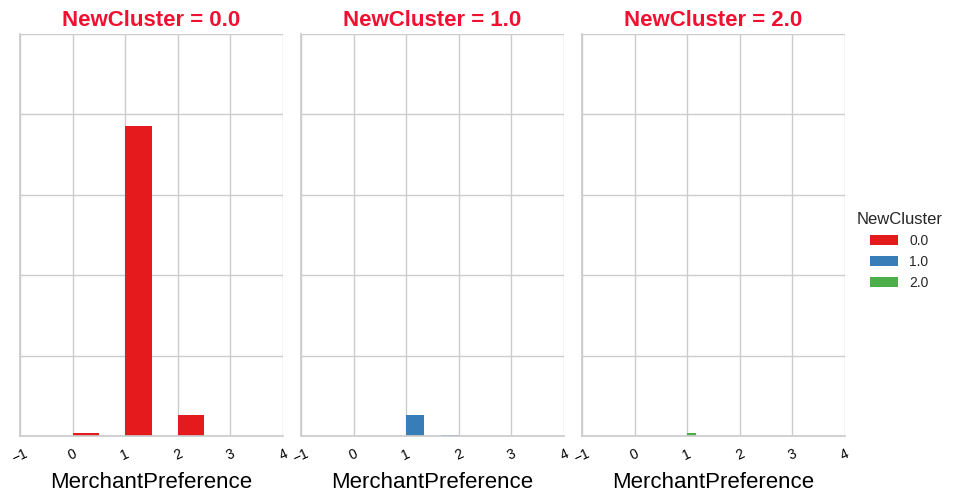

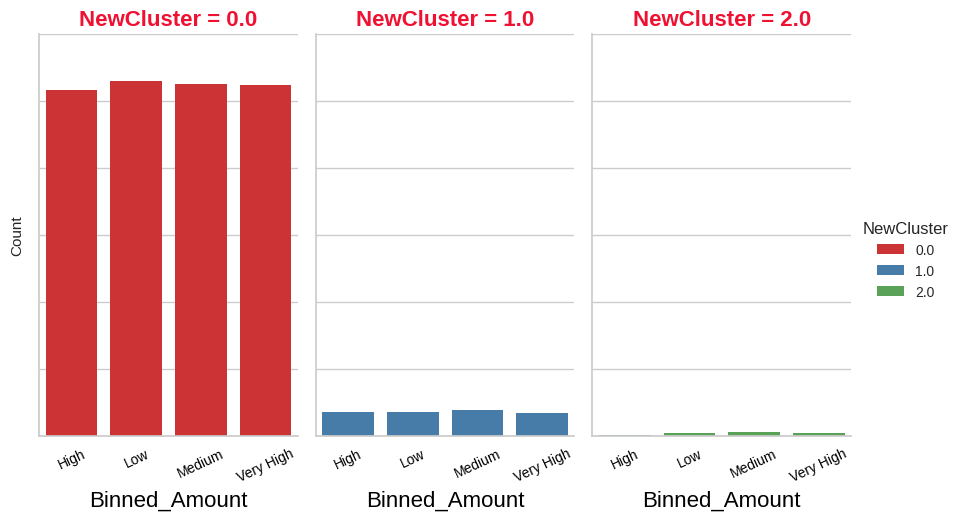

In [127]:
for col in features:
    if col == "Cluster":
        # Skip if col is the cluster column
        continue

    diag = sns.FacetGrid(df, col="NewCluster", hue="NewCluster", palette="Set1")

    # Jika kolom numeric, buat histogram
    if df[col].dtype in [np.int64, np.float64]:
        diag.map(plt.hist, col, bins=6, ec="k")
    else:
        # Jika kolom kategorikal, buat countplot
        unique_order = sorted(df[col].dropna().unique())
        diag.map(sns.countplot, col, order=unique_order)
        diag.set_axis_labels(col, "Count")

    diag.set_xticklabels(rotation=25, color='black')
    diag.set_yticklabels(color='black')
    diag.set_xlabels(size=16, color='black')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)
    diag.add_legend()

    plt.show()

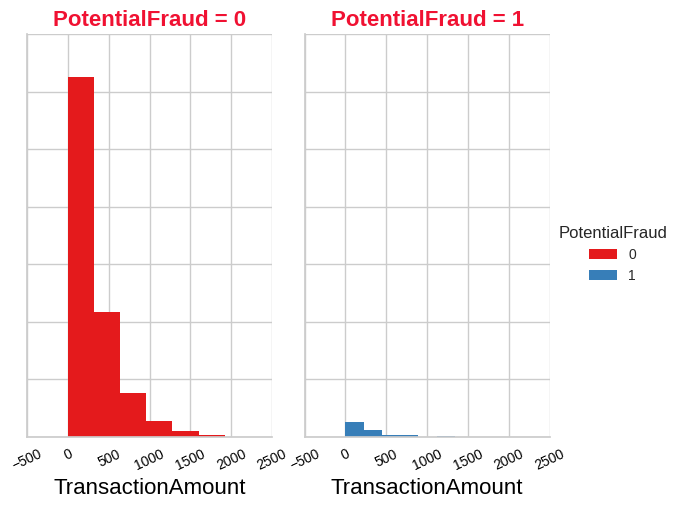

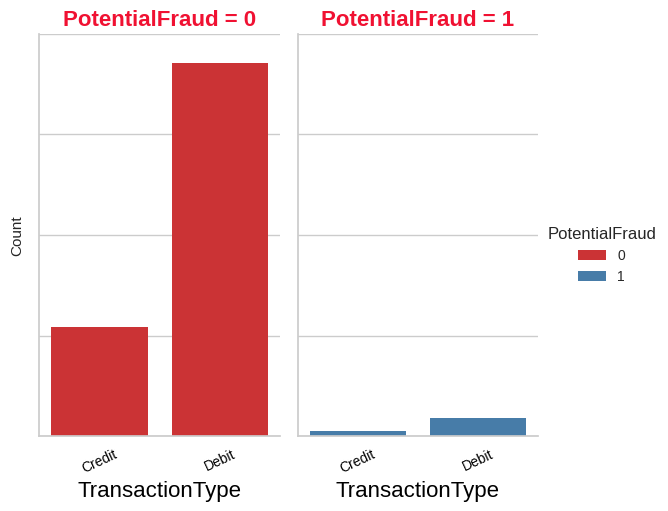

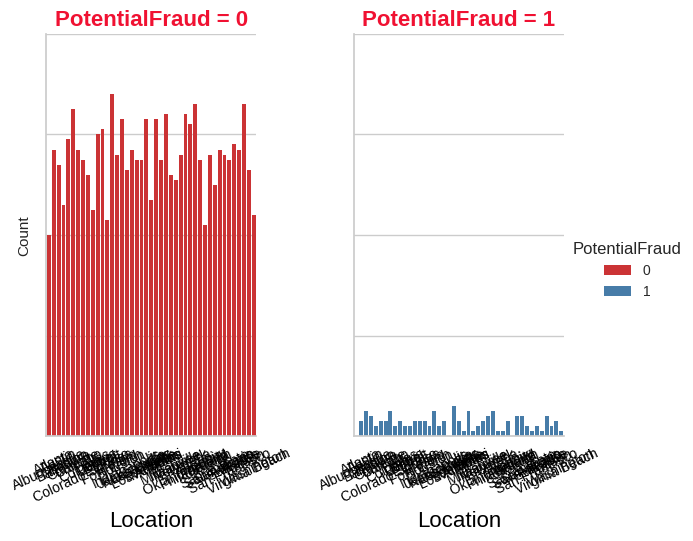

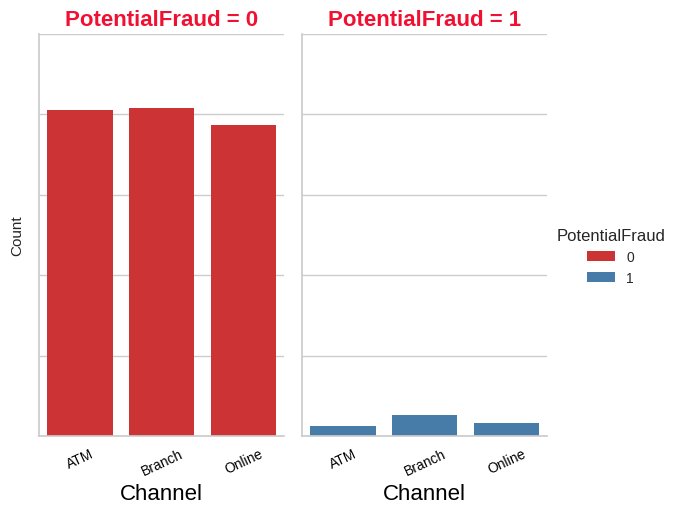

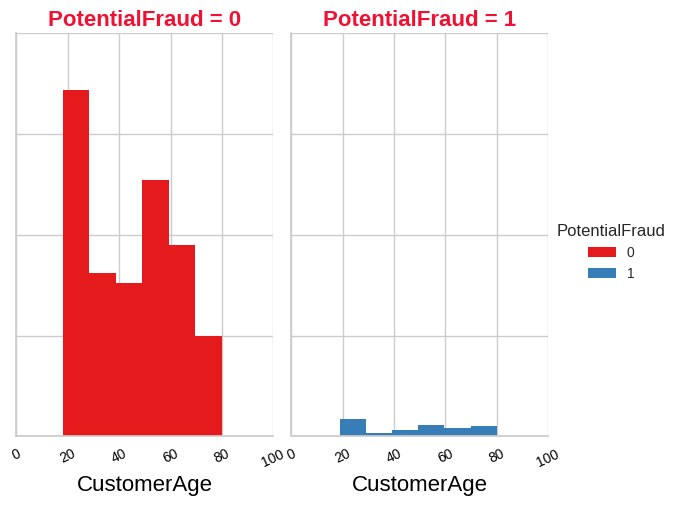

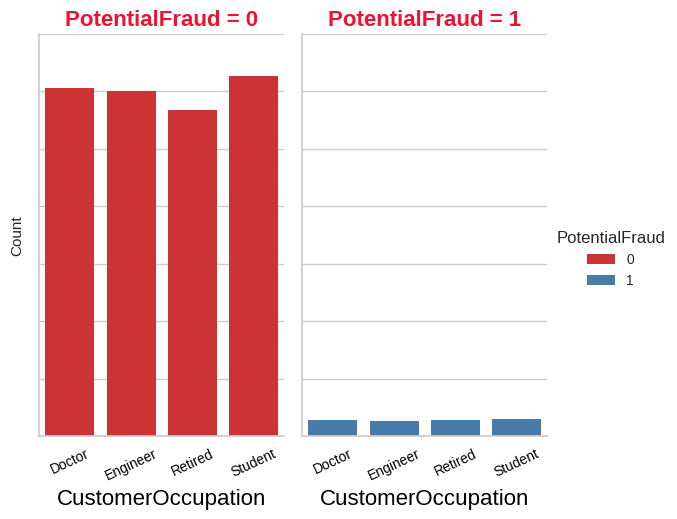

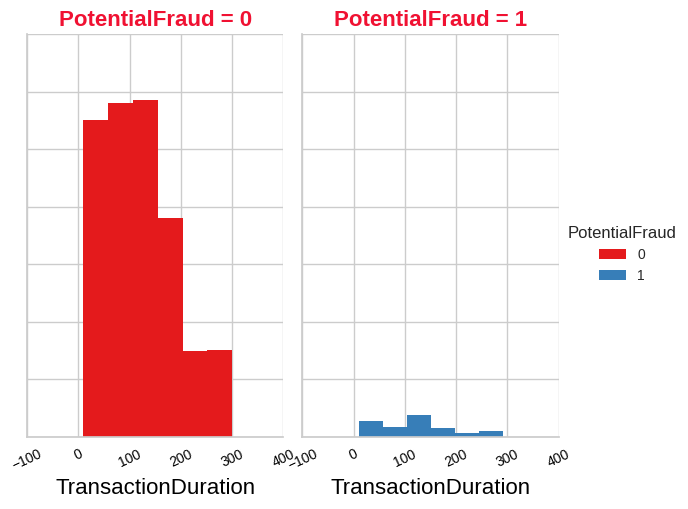

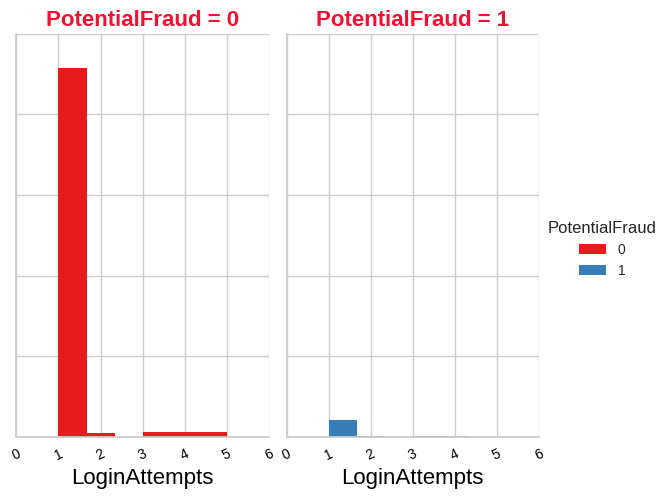

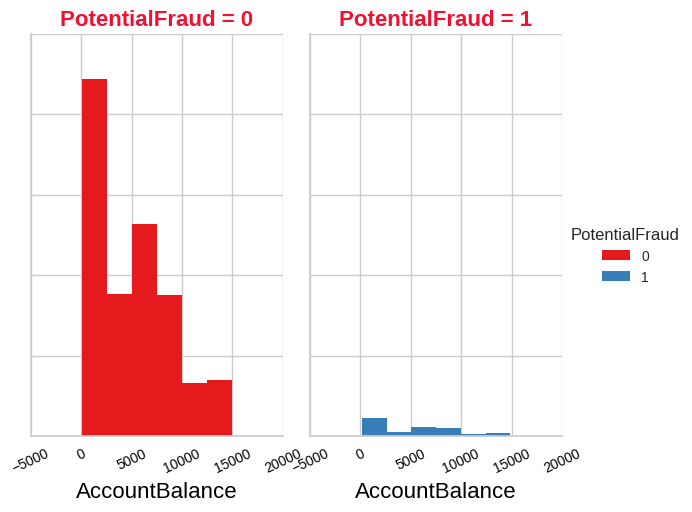

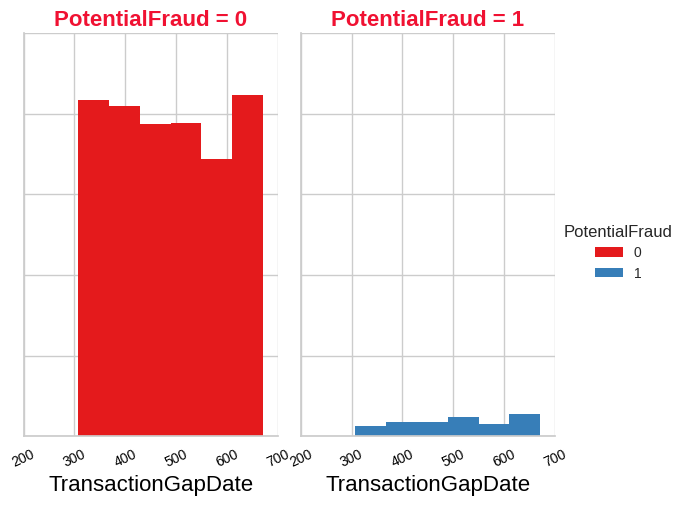

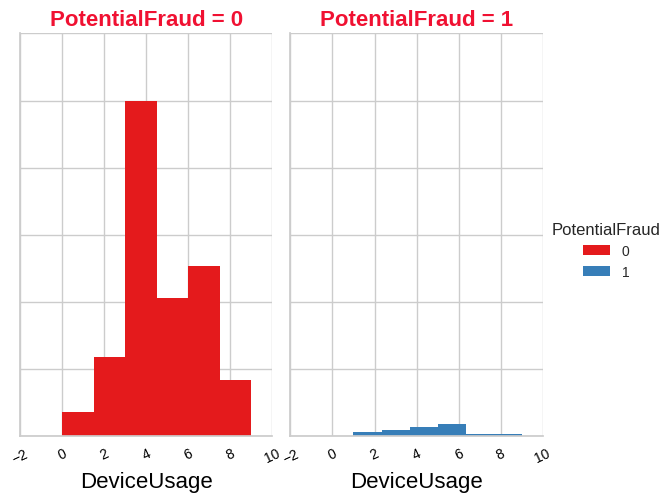

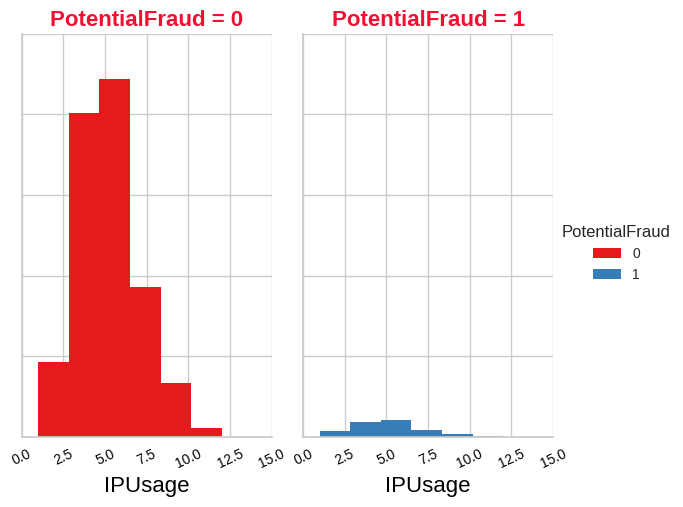

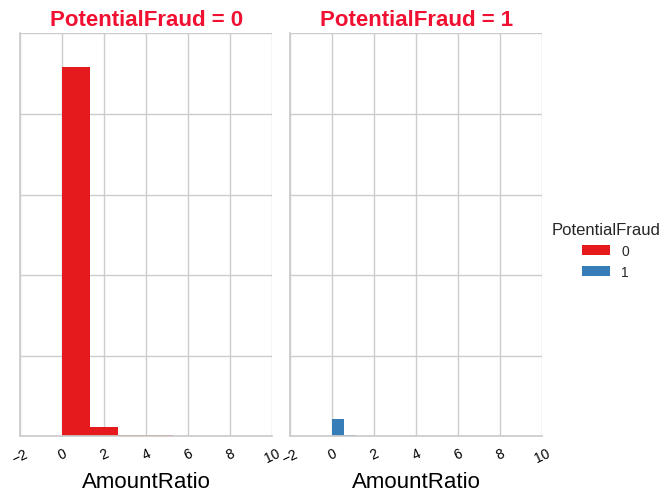

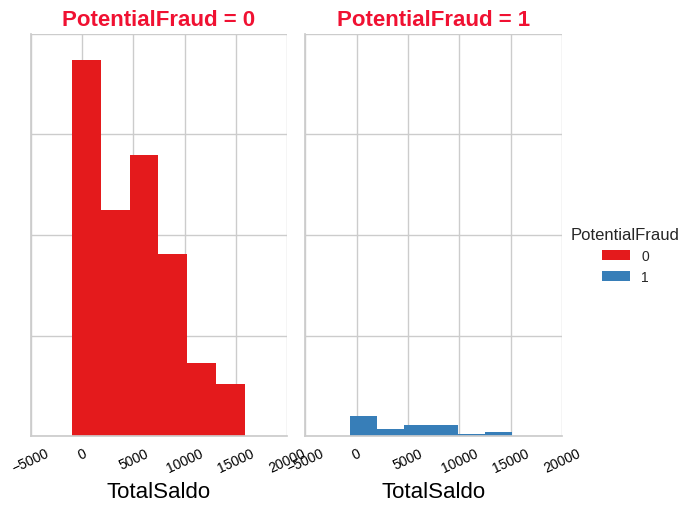

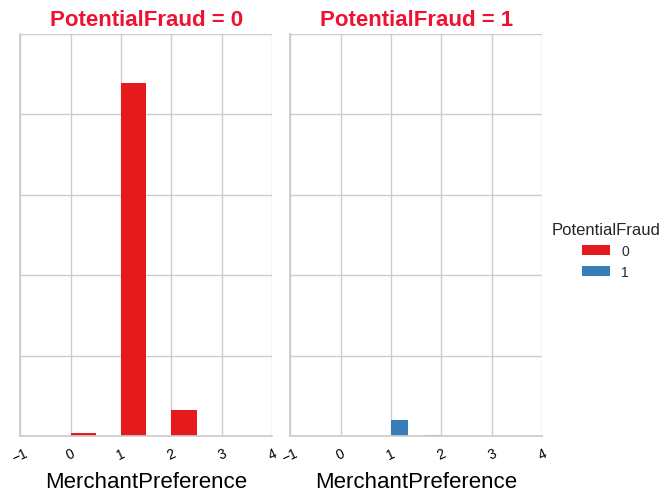

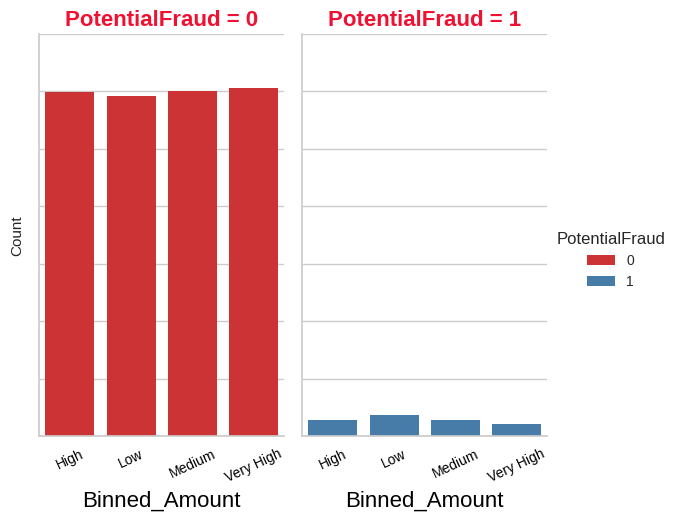

In [128]:
for col in features:
    if col == "Cluster":
        # Skip if col is the cluster column
        continue

    diag = sns.FacetGrid(df, col="PotentialFraud", hue="PotentialFraud", palette="Set1")

    # Jika kolom numeric, buat histogram
    if df[col].dtype in [np.int64, np.float64]:
        diag.map(plt.hist, col, bins=6, ec="k")
    else:
        # Jika kolom kategorikal, buat countplot
        unique_order = sorted(df[col].dropna().unique())
        diag.map(sns.countplot, col, order=unique_order)
        diag.set_axis_labels(col, "Count")

    diag.set_xticklabels(rotation=25, color='black')
    diag.set_yticklabels(color='black')
    diag.set_xlabels(size=16, color='black')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)
    diag.add_legend()

    plt.show()

### **d. Analisis karakteristik tiap cluster**

In [129]:
# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_transaction_amount = cluster_data.loc[:, 'TransactionAmount'].mean()  # Rata-rata Transaction Amount
        mean_transaction_duration = cluster_data.loc[:, 'TransactionDuration'].mean()  # Rata-rata Transaction Duration
        mean_amount_ratio = cluster_data.loc[:, 'AmountRatio'].mean()  # Rata-rata Amount Ratio
        mean_ip_usage = cluster_data.loc[:, 'IPUsage'].mean()  # Rata-rata IP Usage

        # Menampilkan hasil

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount: {mean_transaction_amount:.2f}")
        print(f"Rata-rata Transaction Duration: {mean_transaction_duration:.2f}")
        print(f"Rata-rata Amount Ratio: {mean_amount_ratio:.2f}")
        print(f"Rata-rata IP Usage: {mean_ip_usage:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(df, df['NewCluster'], k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount: 299.04
Rata-rata Transaction Duration: 120.52
Rata-rata Amount Ratio: 0.20
Rata-rata IP Usage: 5.11

Cluster 2:
Rata-rata Transaction Amount: 275.93
Rata-rata Transaction Duration: 116.66
Rata-rata Amount Ratio: 0.21
Rata-rata IP Usage: 5.32

Cluster 3:
Rata-rata Transaction Amount: 264.58
Rata-rata Transaction Duration: 118.53
Rata-rata Amount Ratio: 0.16
Rata-rata IP Usage: 4.21



Analisis Karakteristik Numerik Tiap Cluster:
           TransactionAmount                          CustomerAge              \
                        mean    min      max   median        mean   min   max   
NewCluster                                                                      
0.0               299.038859   0.32  1919.11  209.025   44.663494  18.0  80.0   
1.0               275.927143   0.26  1431.30  208.070   47.047297  18.0  80.0   
2.0               264.583889  27.64   917.81  150.405   44.105263  19.0  72.0   

                  TransactionDuration        ... AmountRatio            \
           median                mean   min  ...         max    median   
NewCluster                                   ...                         
0.0          45.0          120.517900  10.0  ...    7.895988  0.051765   
1.0          49.5          116.659864  11.0  ...    3.668922  0.043968   
2.0          48.0          118.526316  23.0  ...    0.609211  0.042762   

             TotalSald

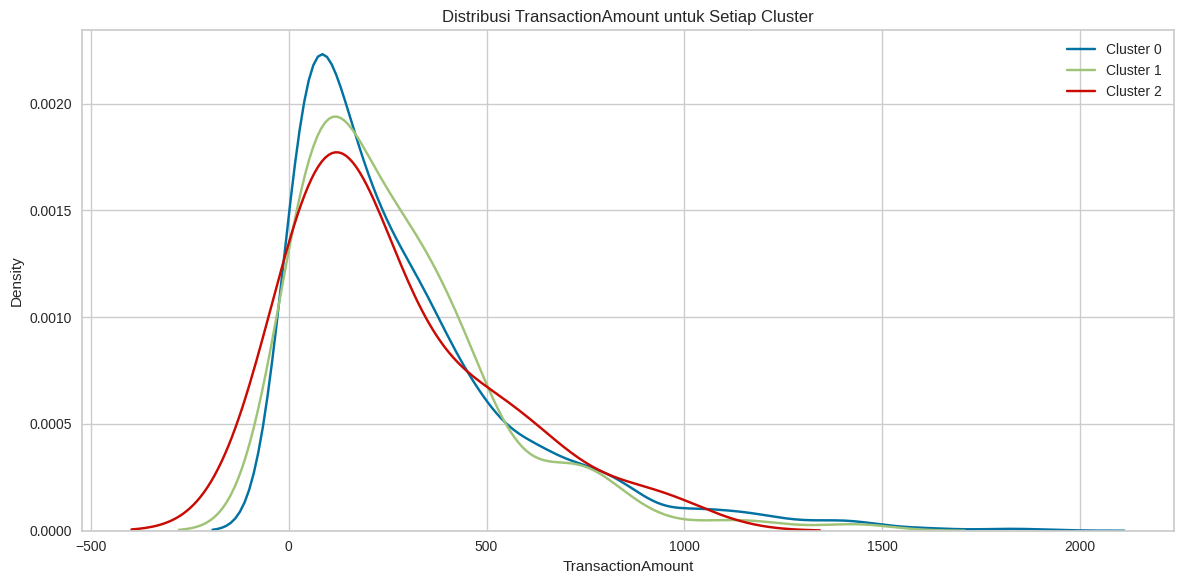

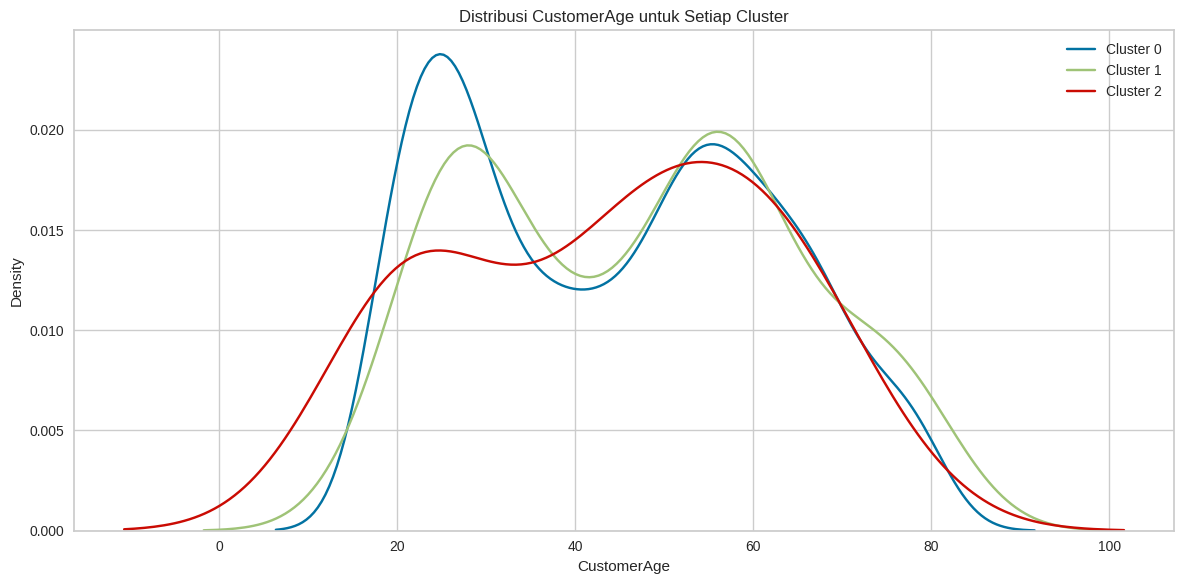

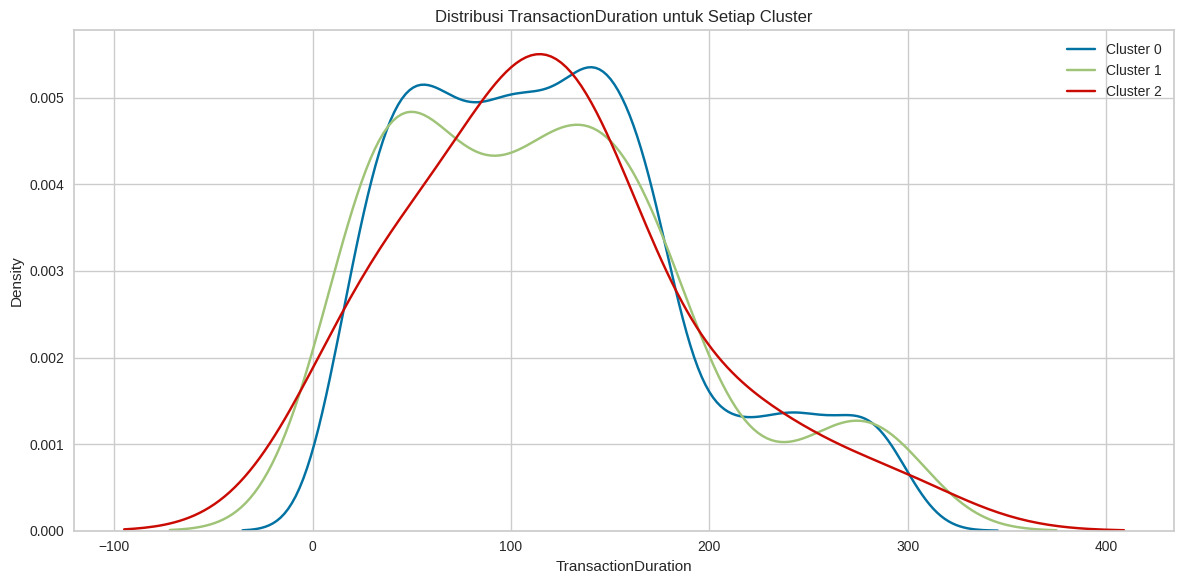

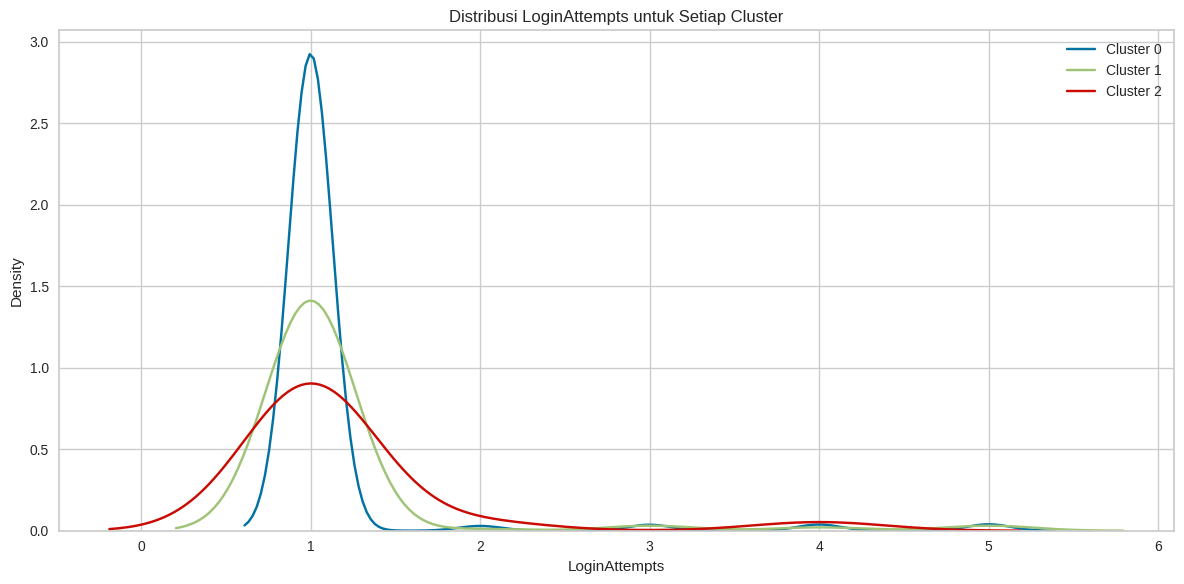

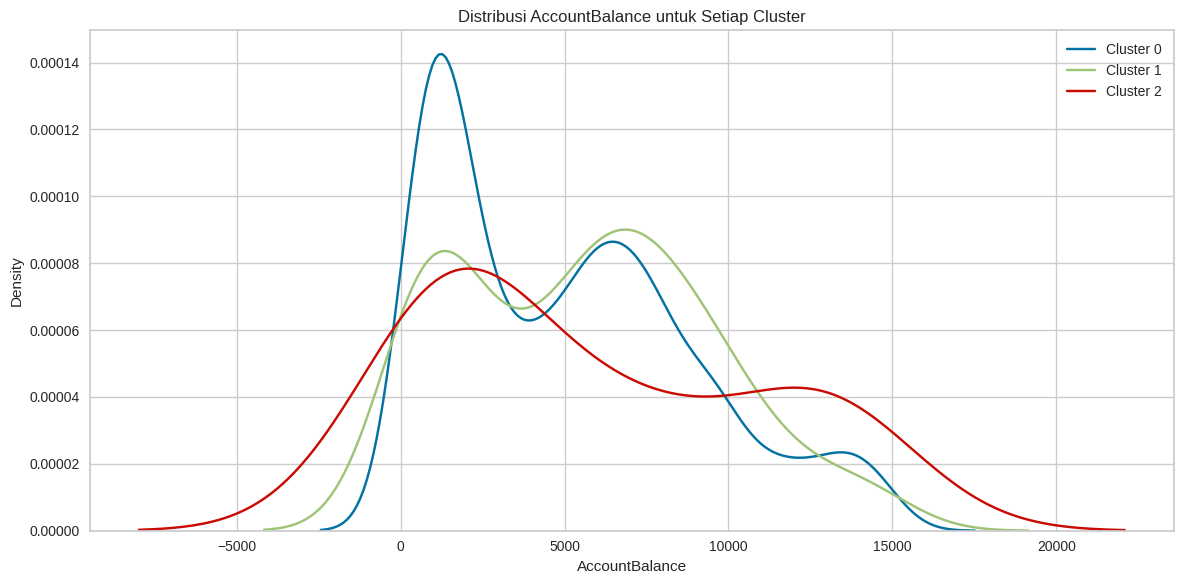

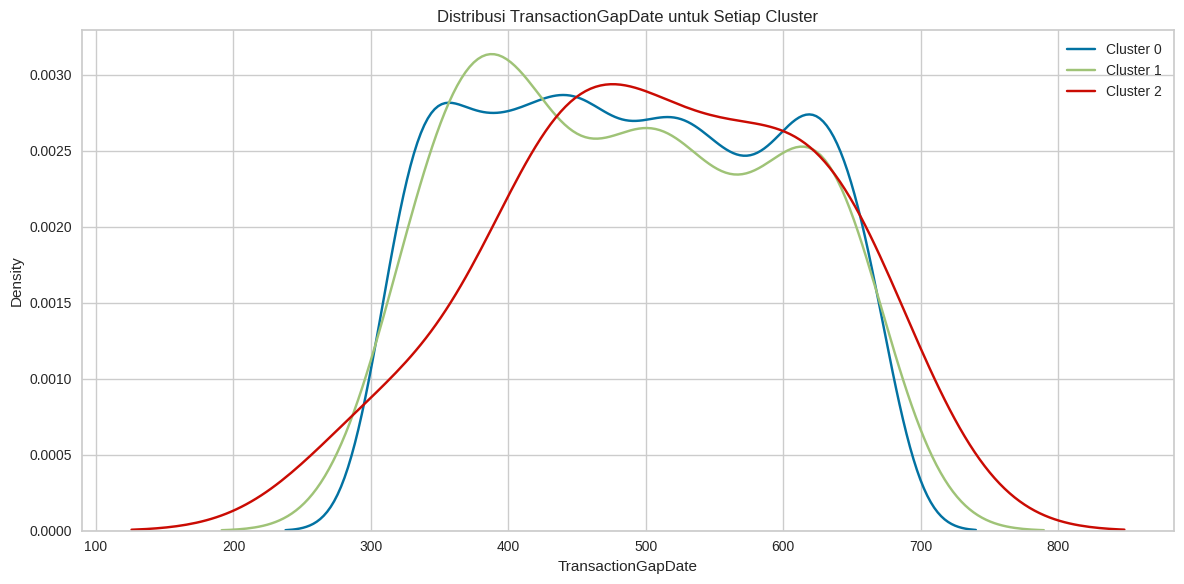

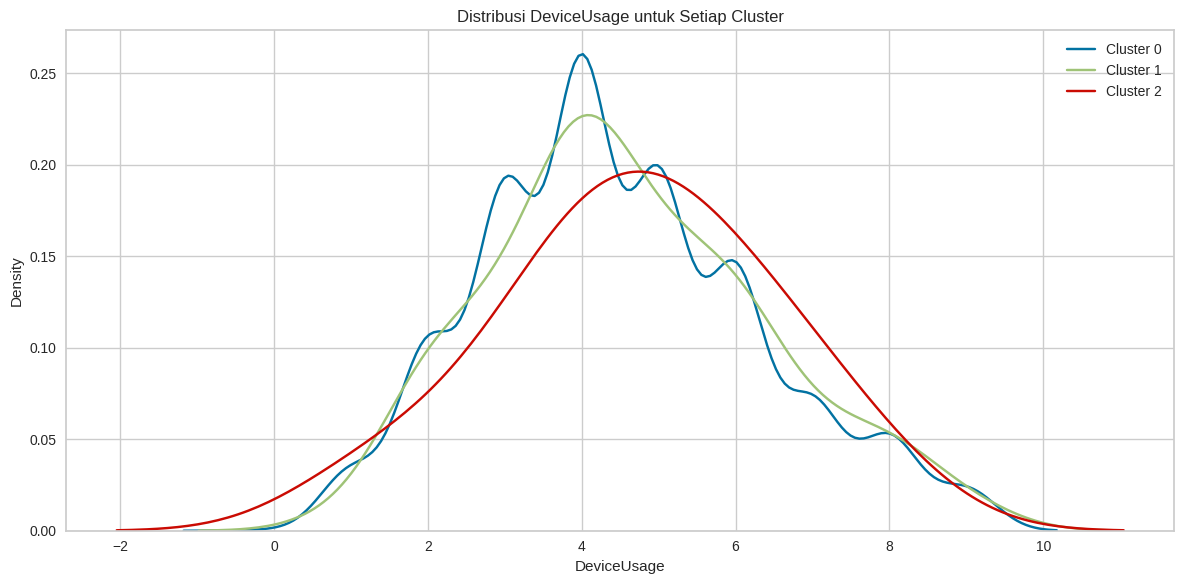

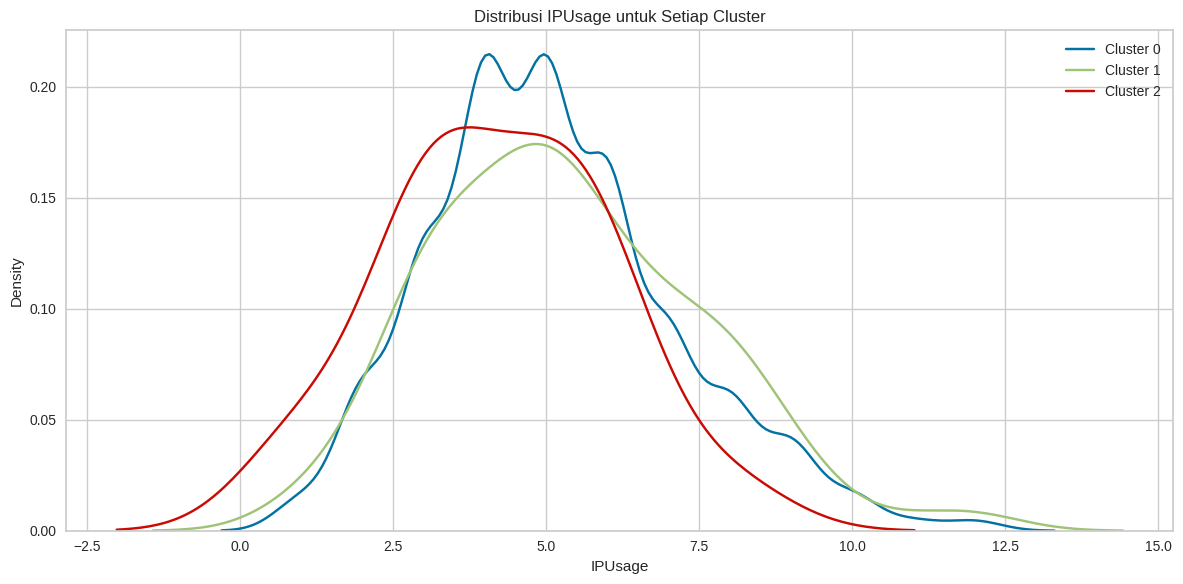

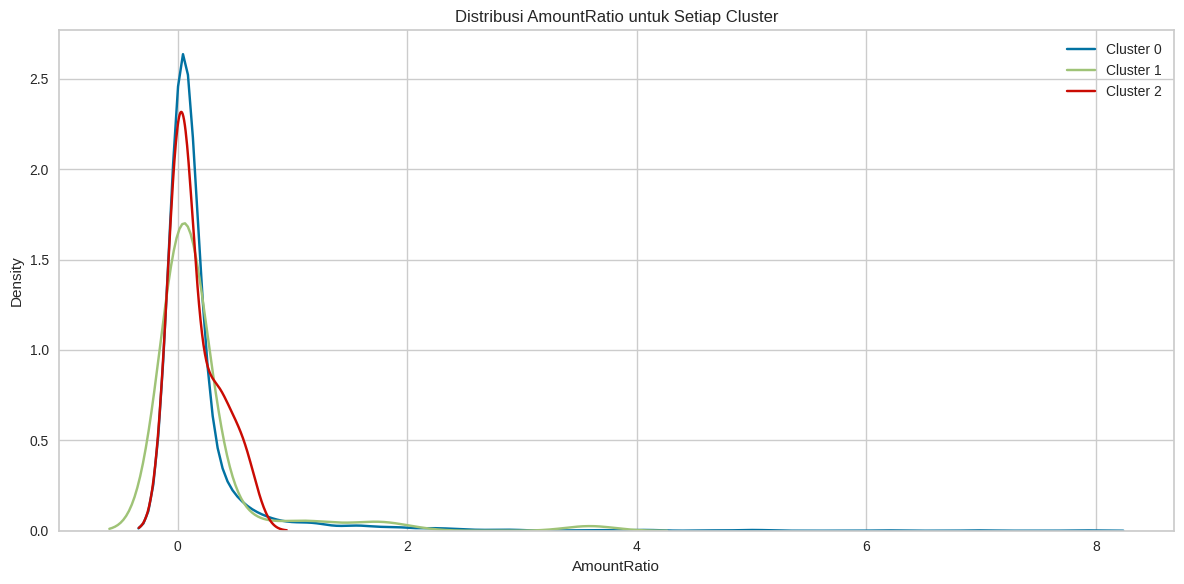

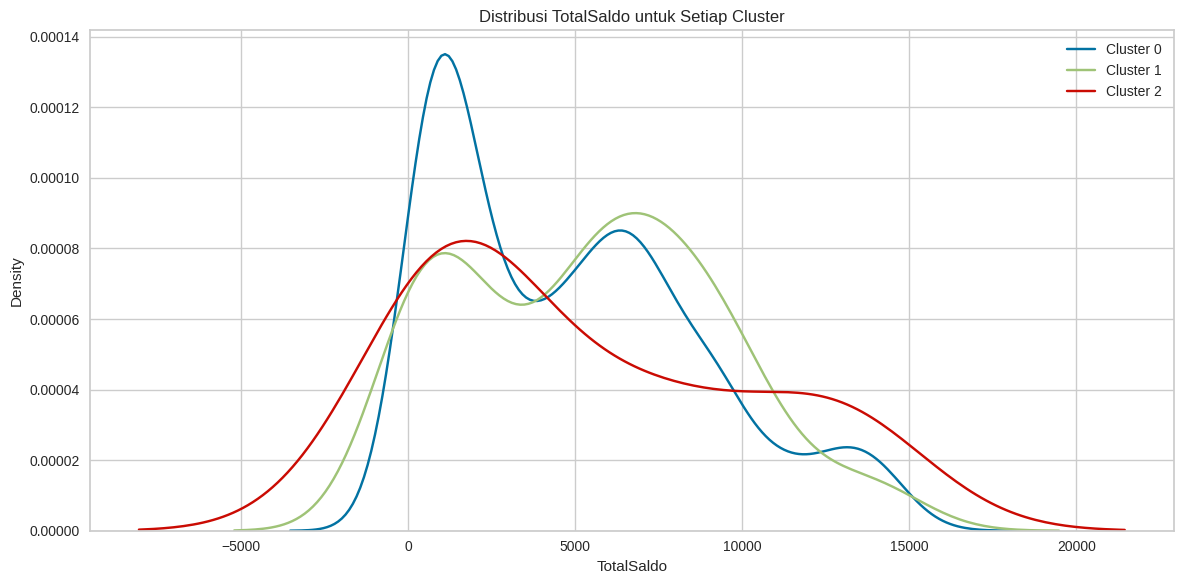

<ipython-input-141-c1dd443ec7f4>:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['NewCluster'] == cluster][col], label=f'Cluster {cluster}')


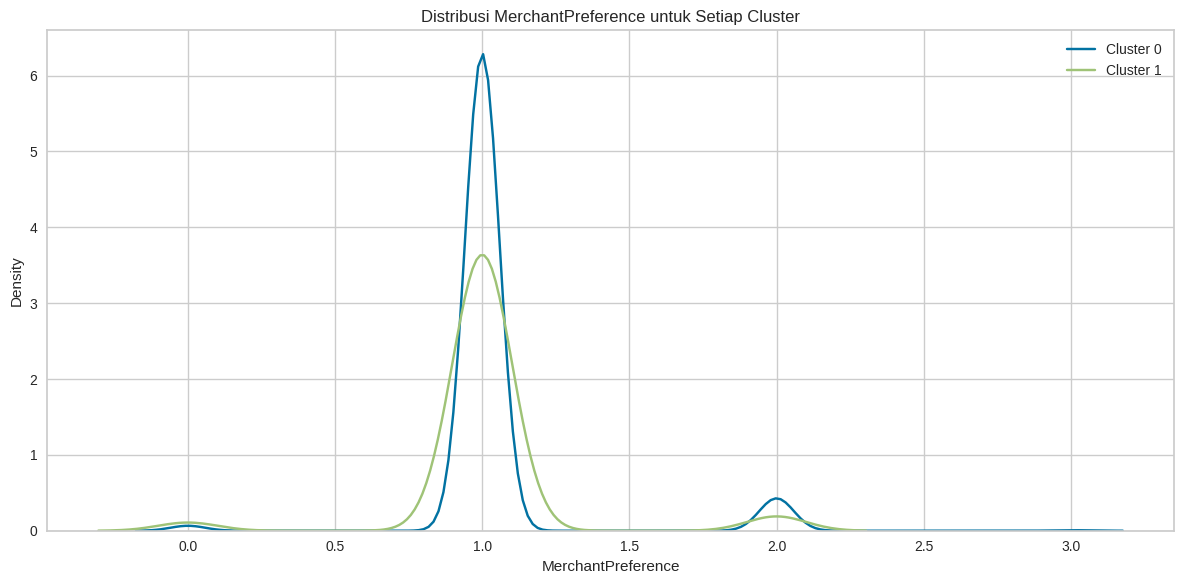

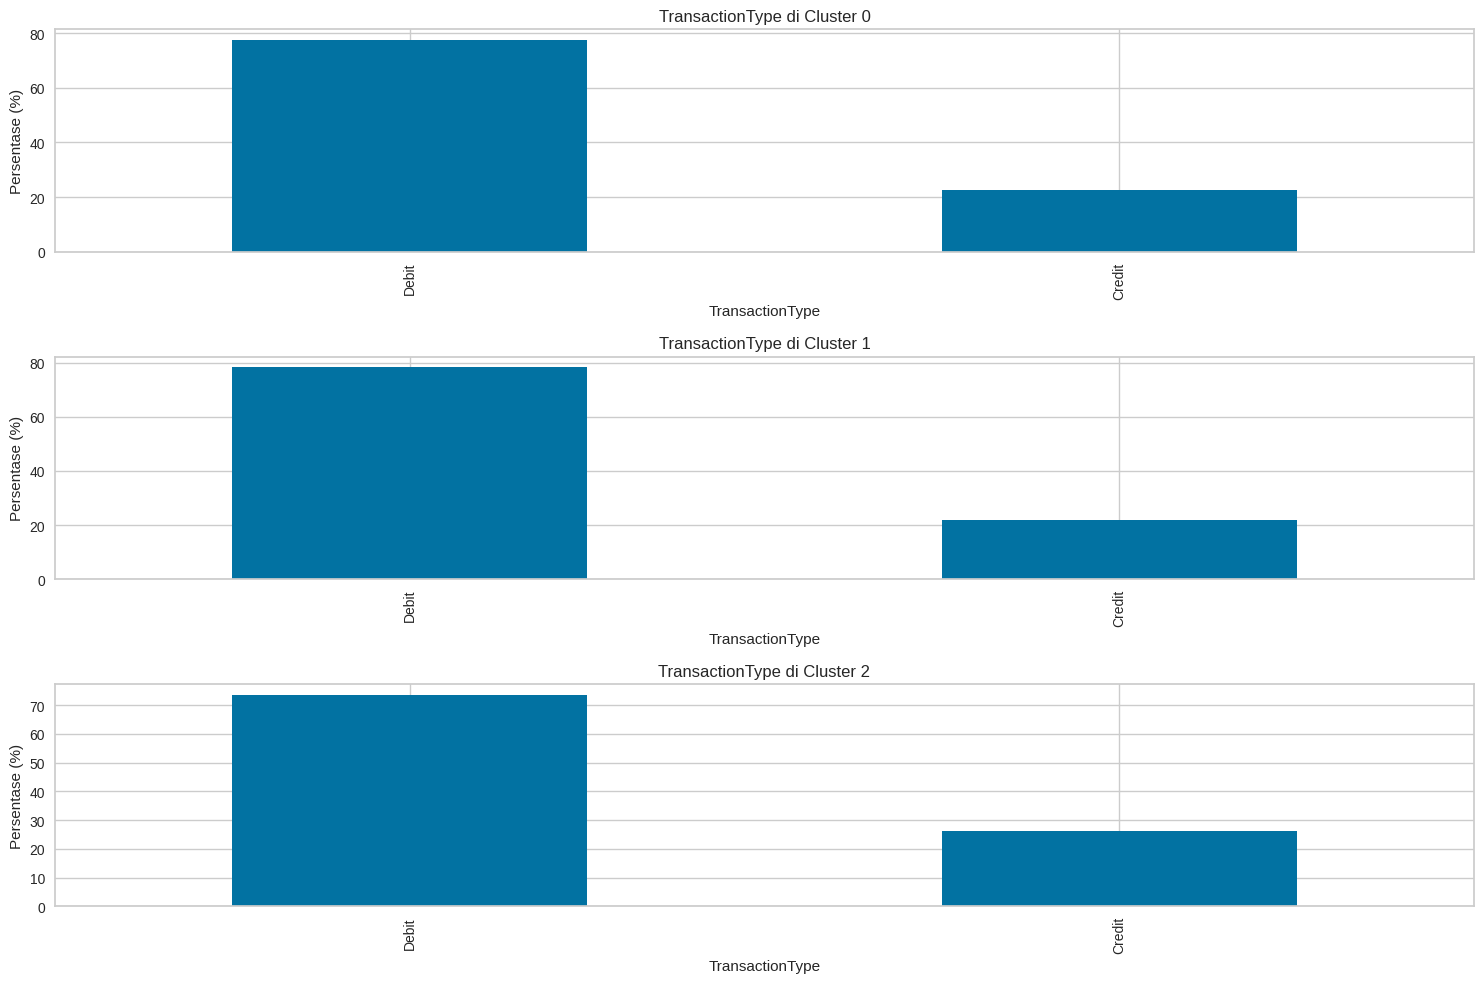

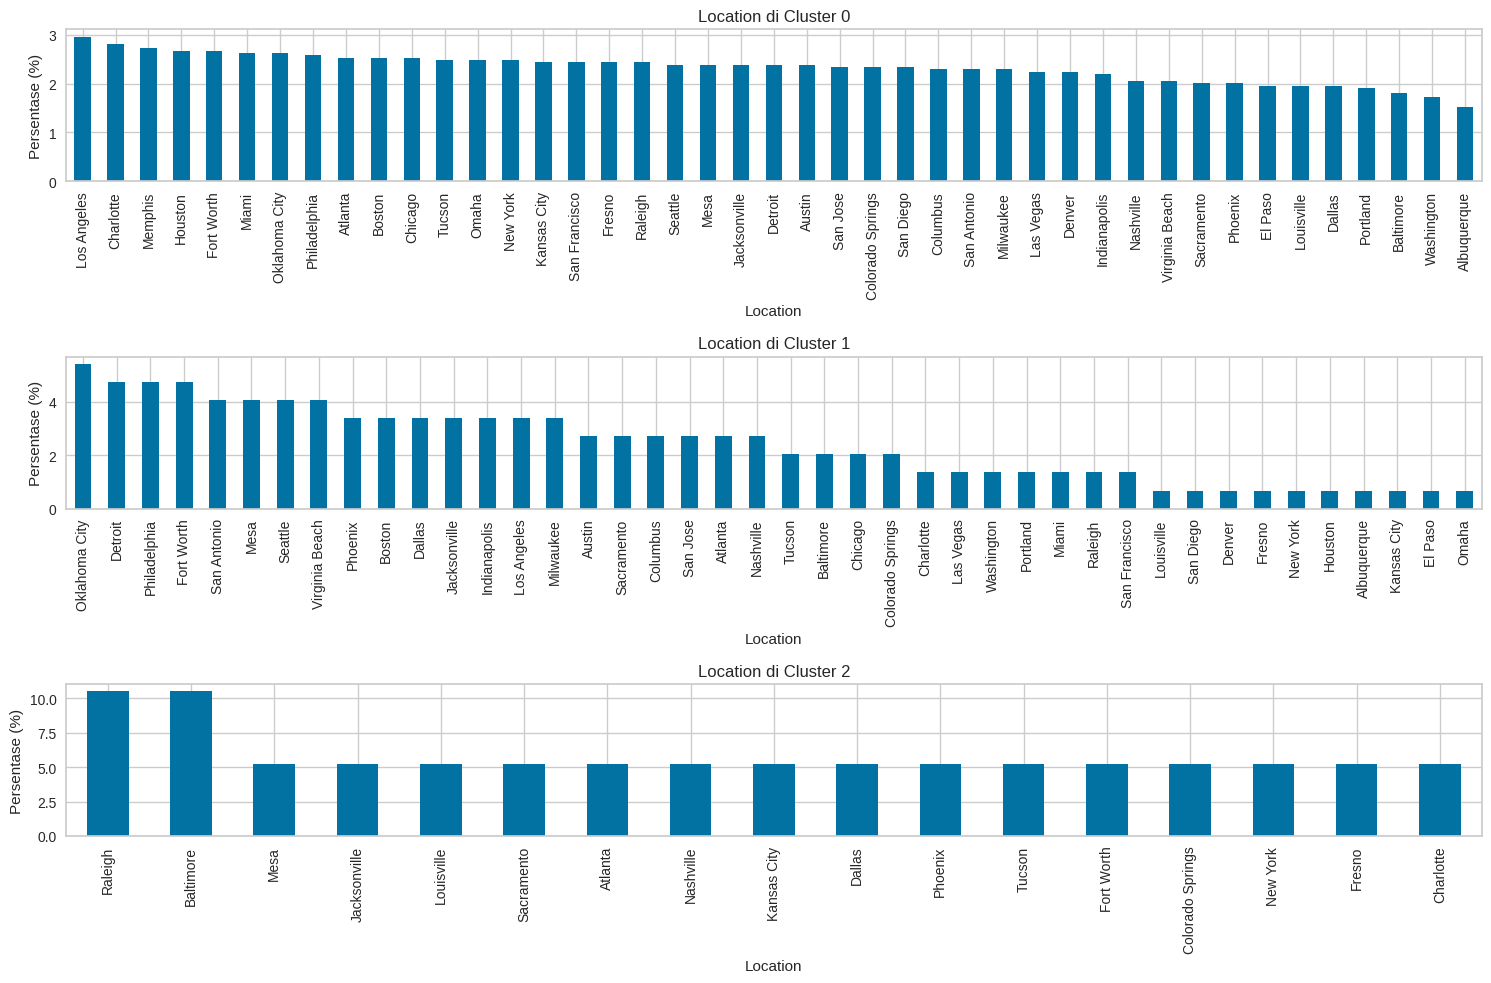

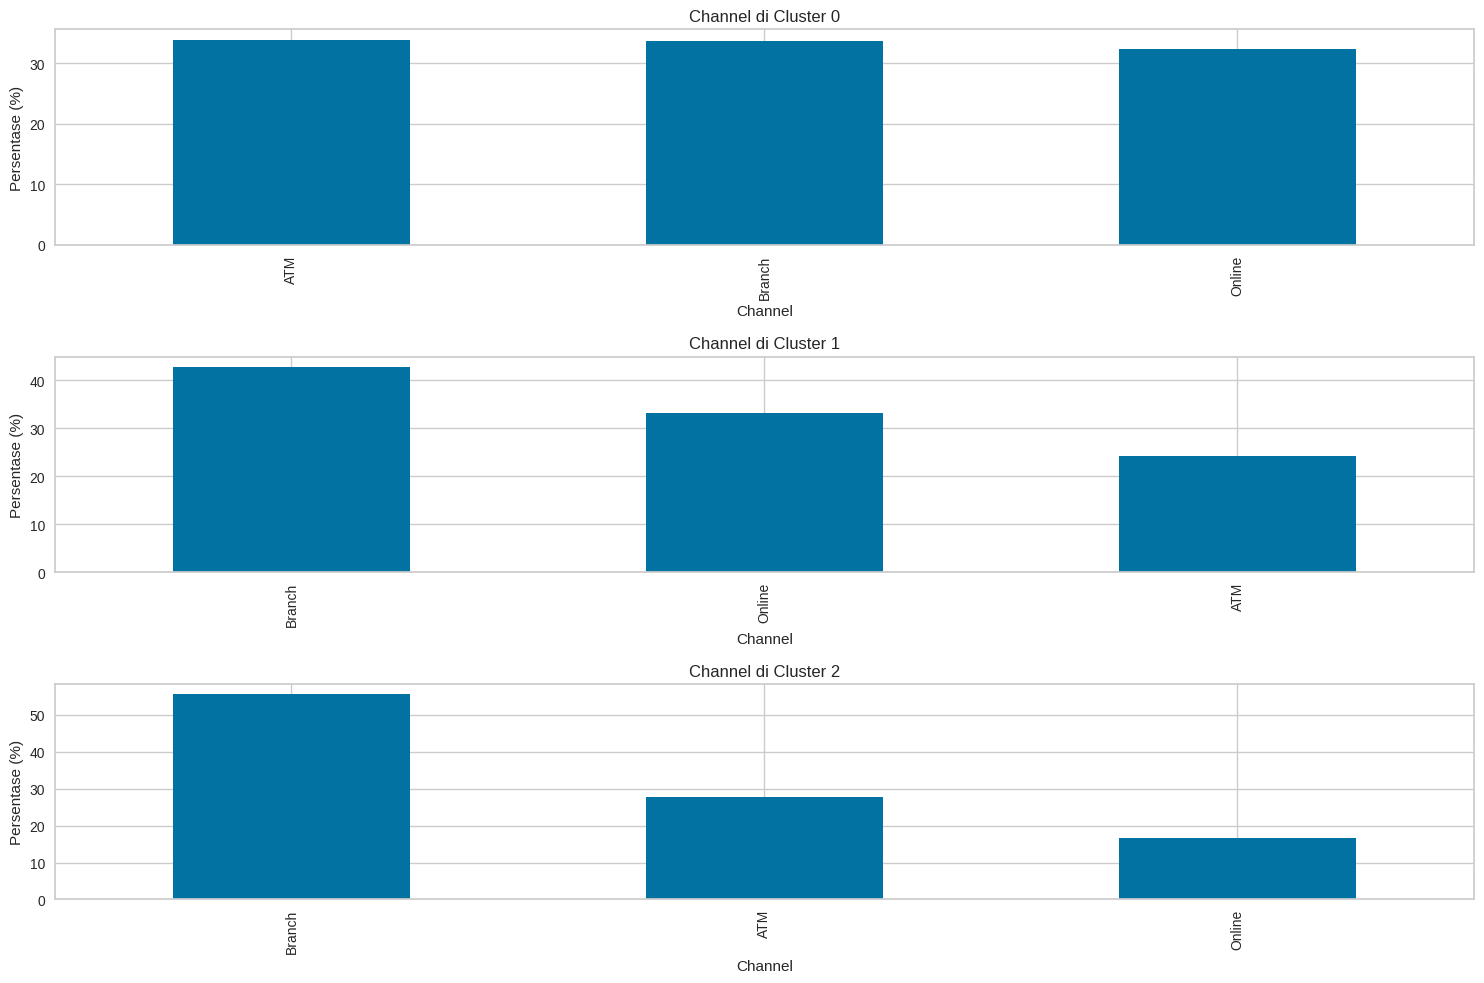

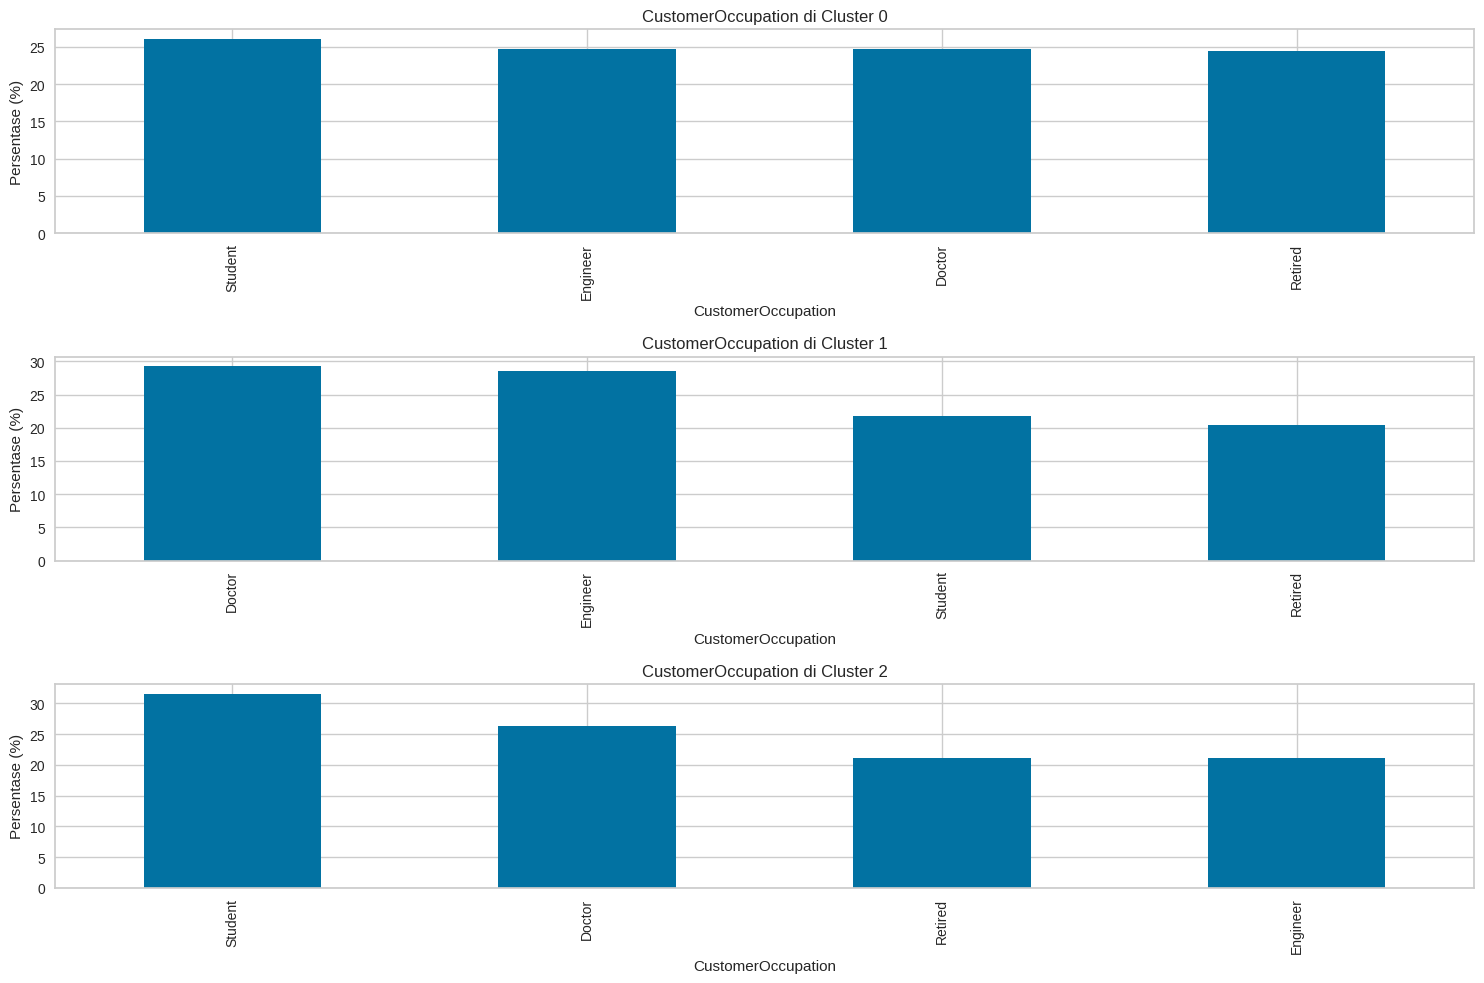

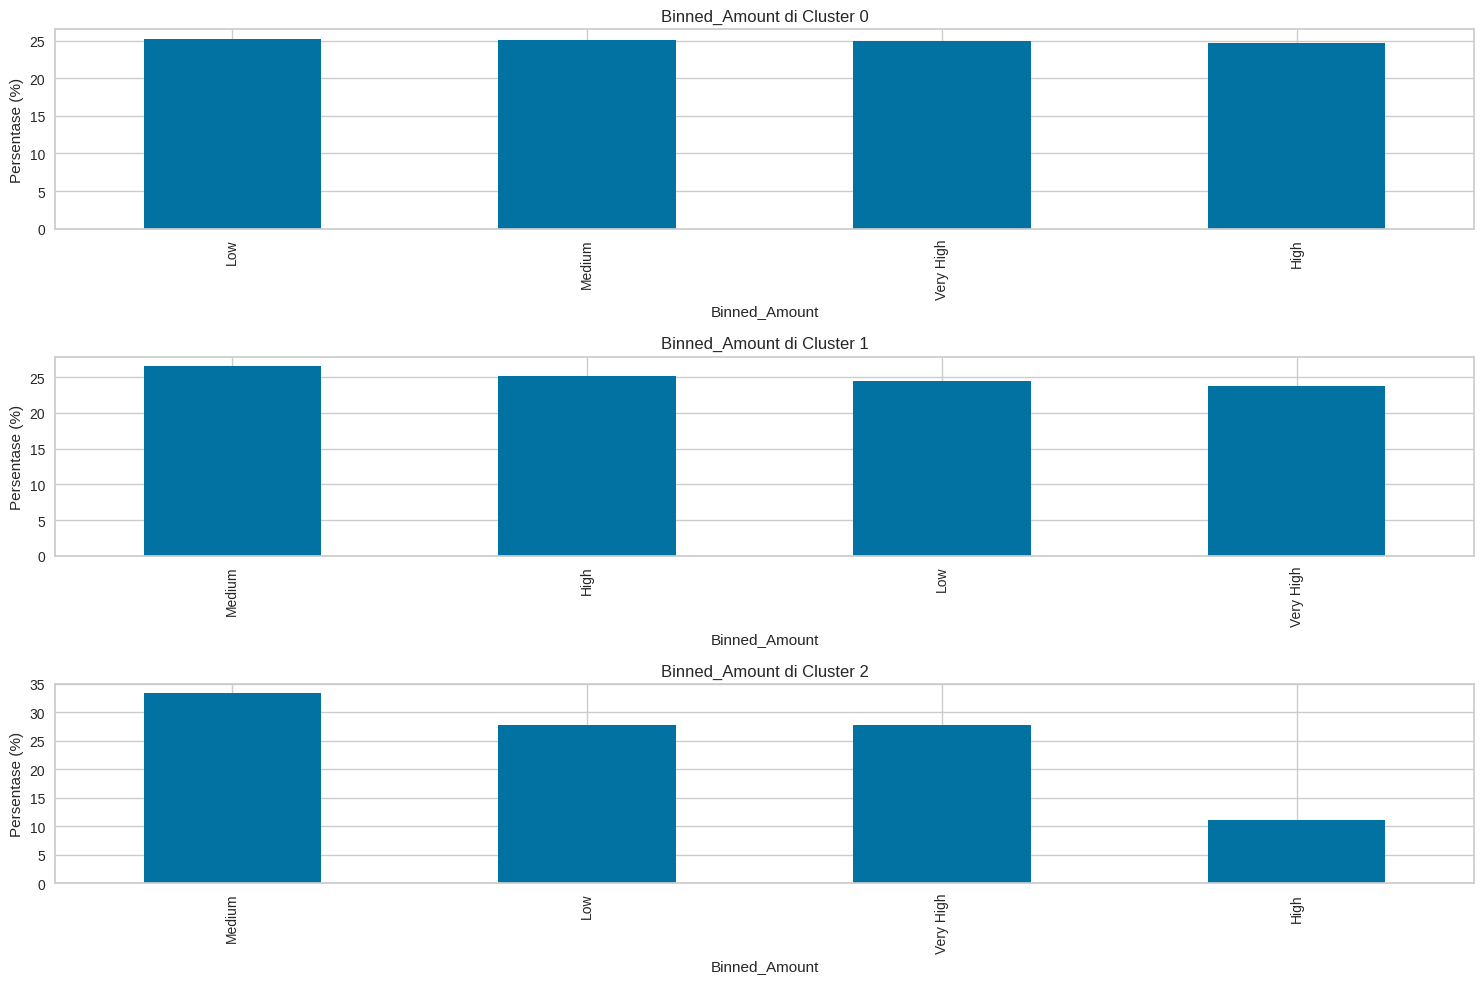

In [141]:
# Analisis karakteristik tiap cluster

optimal_clusters = 3
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

exclude_cols = ['Cluster', 'NewCluster', 'DistanceToCentroid', 'NewDistanceToCentroid', 'PotentialFraud', 'Binned_Amount']
numerical_features = [col for col in numerical_features if col not in exclude_cols]


categorical_features = df.select_dtypes(include='object').columns.tolist()

if 'Binned_Amount' in df.columns and 'Binned_Amount' not in categorical_features:
     categorical_features.append('Binned_Amount')


cluster_analysis_num = df.groupby('NewCluster')[numerical_features].agg(['mean', 'min', 'max', 'median']) # Use 'NewCluster' as the grouping column
print("\nAnalisis Karakteristik Numerik Tiap Cluster:")
print(cluster_analysis_num)

# Analisis distribusi fitur kategorikal di tiap cluster
for cluster in range(optimal_clusters):
    print(f"\nDistribusi Kategorikal untuk Cluster {cluster}:")
    for col in categorical_features:
        print(f"\n{col} di Cluster {cluster}:")

        print(df[df['NewCluster'] == cluster][col].value_counts(normalize=True) * 100)

# Visualisasi karakteristik cluster for numerical features
for col in numerical_features:
    plt.figure(figsize=(12, 6))
    for cluster in range(optimal_clusters):

        sns.kdeplot(df[df['NewCluster'] == cluster][col], label=f'Cluster {cluster}')
    plt.title(f'Distribusi {col} untuk Setiap Cluster')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualisasi distribusi kategorikal di tiap cluster
for col in categorical_features:
    plt.figure(figsize=(15, 10))
    for i, cluster in enumerate(range(optimal_clusters)):
        plt.subplot(optimal_clusters, 1, i + 1)

        cluster_data = df[df['NewCluster'] == cluster]
        (cluster_data[col].value_counts(normalize=True) * 100).plot(kind='bar')
        plt.title(f'{col} di Cluster {cluster}')
        plt.ylabel('Persentase (%)')
    plt.tight_layout()
    plt.show()

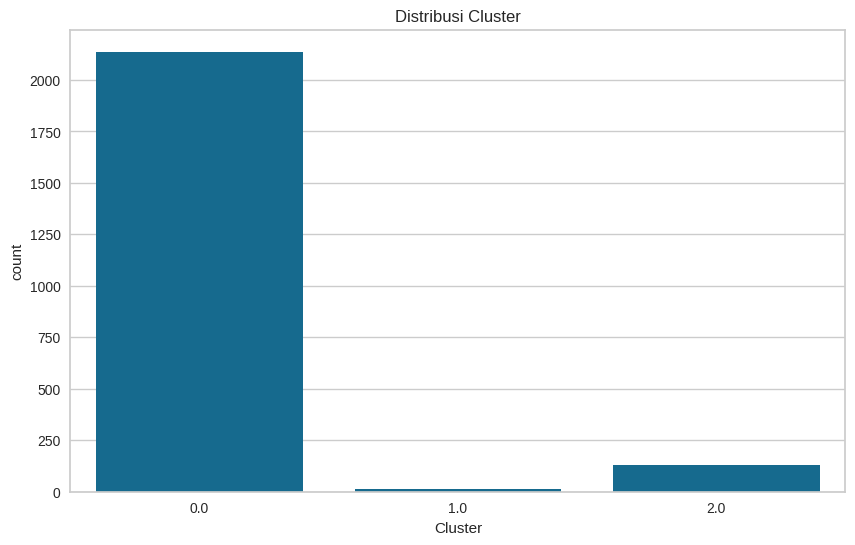

In [142]:
# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Cluster')
plt.show()

### **Analisis Karakteristik Cluster dari Model K-Means**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans pada dataset transaksi bank.

### **Cluster 0: Transaksi dengan Nilai dan Saldo Tinggi (sekitar 37.5% dari total)**

- Rata rata TransactionAmount: $299.04

- Rata rata CustomerAge: 44.66 tahun

- Rata rata TransactionDuration: 120.52 detik

- Rata rata AccountBalance: sekitar $4,920.65

- Distribusi Pekerjaan: Mahasiswa, Insinyur, Dokter, dan Pensiunan dengan proporsi relatif seimbang

- Saluran Transaksi: ATM (33.95%), Branch (33.72%), Online (32.33%)

Analisis: Cluster ini terdiri dari nasabah dengan transaksi dan saldo yang relatif tinggi dan beragam usia. Transaksi tersebar merata di berbagai channel dan pekerjaan, menunjukkan kelompok pelanggan yang cukup heterogen namun aktif secara finansial. Bank dapat memfokuskan layanan premium dan personalisasi untuk segmen ini.

### **Cluster 1: Transaksi Nasabah dengan Saldo dan Usia Lebih Tinggi (sekitar 37.5% dari total)**

- Rata rata TransactionAmount: $275.93

- Rata rata CustomerAge: 47.05 tahun

- Rata rata TransactionDuration: 116.66 detik

- Rata rata AccountBalance: sekitar $5,443.0

- Distribusi Pekerjaan: Didominasi oleh Dokter dan Insinyur

- Saluran Transaksi: Branch (42.76%), Online (33.10%), ATM (24.14%)

Analisis: Cluster ini didominasi oleh nasabah yang lebih tua dengan saldo dan transaksi menengah ke atas. Preferensi penggunaan saluran lebih condong ke cabang, menunjukkan kebutuhan layanan perbankan yang lebih tradisional dan personal. Bank dapat mengoptimalkan layanan cabang dan produk investasi untuk segmen ini.

### **Cluster 2: Transaksi dengan Saldo Rendah dan Usia Lebih Muda (sekitar 25% dari total)**

- Rata rata TransactionAmount: $264.58

- Rata rata CustomerAge: 44.10 tahun

- Rata rata TransactionDuration: 118.53 detik

- Rata rata AccountBalance: sekitar $5,237.73 (median lebih rendah, sekitar $2,295)

- Distribusi Pekerjaan: Mahasiswa dan Dokter lebih dominan

- Saluran Transaksi: Branch (55.56%), ATM (27.78%), Online (16.67%)

Analisis: Cluster ini mewakili nasabah dengan saldo dan transaksi yang relatif lebih rendah, dengan kecenderungan usia muda dan preferensi transaksi di cabang. Bank dapat mengembangkan produk edukasi finansial dan layanan biaya rendah untuk segmen ini.

### **Menyimpan model dalam format H5**

In [130]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

### **Export data**

In [134]:
# Menyimpan hasil clustering ke dalam file CSV
df.to_csv('data_clustering.csv', index=False)
print("\nHasil clustering telah disimpan dalam file 'data_clustering.csv'")


Hasil clustering telah disimpan dalam file 'data_clustering.csv'


In [136]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
# Contoh: X_train, y_train adalah data latihmu
# Ganti dengan variabel sesuai data kamu

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

joblib.dump(dtree, "decision_tree_model.h5")

['decision_tree_model.h5']

In [137]:
df.to_csv('/content/drive/MyDrive/data_clustering.csv', index=False)